In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# load data

In [2]:
!pip install dowhy
!pip install dowhy[graphviz]
!pip install pygraphviz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 886.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.2/399.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.0/193.0 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
  Attempting uninstall: cvxpy
    Found existing installation: cvxpy 1.6.7
    Uninstalling cvxpy-1.6.7:
      Successfully uninstalled cvxpy-1.6.7
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requireme

In [ ]:
import pandas as pd
import numpy as np
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings

# Suppress some common warnings for cleaner output
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_freq_scaled.csv')
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-0.188346,0.477508,0.548451,0.4547,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,0.360923,0
1,-0.099897,0.477508,0.548451,0.4547,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,0.360923,0
2,0.063006,0.477508,0.548451,0.4547,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,0.360923,0
3,0.072800,0.477508,0.019327,0.4547,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,...,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,0.360923,0
4,-0.133449,0.477508,0.548451,0.4547,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,...,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,0.360923,0


# Causal inference

## only label

In [ ]:
dfl = df.drop(columns=['attack_cat'])
dfl.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,-0.188346,0.477508,0.548451,0.4547,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,...,-0.519345,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,0
1,-0.099897,0.477508,0.548451,0.4547,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,...,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,0
2,0.063006,0.477508,0.548451,0.4547,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,...,-0.519345,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,0
3,0.072800,0.477508,0.019327,0.4547,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,...,-0.519345,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,0
4,-0.133449,0.477508,0.548451,0.4547,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,...,-0.396808,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,0


### graphs

=== Identifying Treatment Variables ===
Identified treatment variables: ['dpkts', 'sloss', 'dloss', 'state', 'sbytes']

=== Creating Comprehensive Causal Visualization ===

=== FINDING ANCESTORS OF OUTCOME 'label' ===
Found 9 ancestors for outcome 'label':
  - dload
  - dloss
  - dpkts
  - response_body_len
  - sbytes
  - sloss
  - spkts
  - state

=== FINDING ANCESTORS OF TREATMENT VARIABLES ===

Analyzing treatment variable: 'dpkts'
  Direct causes of 'dpkts': []
  All ancestors of 'dpkts' (1): ['dpkts']

Analyzing treatment variable: 'sloss'
  Direct causes of 'sloss': ['dpkts', 'response_body_len']
  All ancestors of 'sloss' (3): ['dpkts', 'response_body_len', 'sloss']

Analyzing treatment variable: 'dloss'
  Direct causes of 'dloss': ['dpkts', 'sbytes', 'sloss']
  All ancestors of 'dloss' (5): ['dloss', 'dpkts', 'response_body_len', 'sbytes', 'sloss']

Analyzing treatment variable: 'state'
  Direct causes of 'state': ['sbytes']
  All ancestors of 'state' (5): ['dpkts', 'response_b

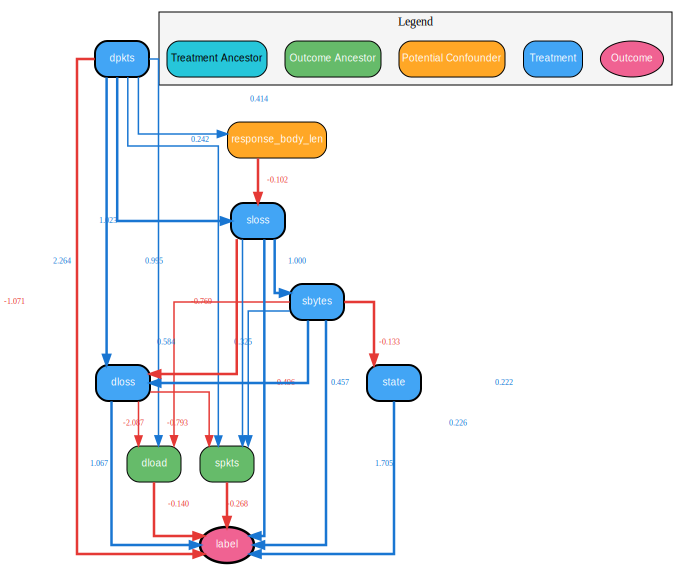


=== Analysis Summary ===
Total nodes in causal structure: 9
Total edges: 22
Outcome ancestors: 9
Treatment ancestors: 6
Potential confounders (overall): 1

Potential confounders (affect both treatments and outcome):
  - response_body_len

Confounders by individual treatment:
  dpkts: None
  sloss: ['dpkts', 'response_body_len']
  dloss: ['dpkts', 'sbytes', 'response_body_len', 'sloss']
  state: ['dpkts', 'sbytes', 'response_body_len', 'sloss']
  sbytes: ['dpkts', 'response_body_len', 'sloss']

Direct causes of each treatment:
  dpkts: None
  sloss: ['dpkts', 'response_body_len']
  dloss: ['dpkts', 'sbytes', 'sloss']
  state: ['sbytes']
  sbytes: ['sloss']

=== DIAGNOSTIC INFORMATION ===
Edge weight threshold used: 0.1
Consider lowering the threshold if few confounders are found

=== Variables for Causal Inference ===
Treatment variables: ['dpkts', 'sloss', 'dloss', 'state', 'sbytes']
Outcome: label
Potential confounders: ['response_body_len']


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import graphviz
from IPython.display import display

def visualize_causal_ancestors_extended(adjacency_matrix, feature_names, outcome_name,
                                      treatment_vars=None, lower_limit=1e-6, max_depth=None):
    """
    Visualizes the causal graph including ancestors of outcome AND treatment variables.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        feature_names (list): A list of column names corresponding to the matrix.
        outcome_name (str): The name of the outcome variable to focus on.
        treatment_vars (list): List of treatment variable names to include ancestors for.
        lower_limit (float, optional): Edges with an absolute weight below this limit are pruned.
        max_depth (int, optional): Maximum depth to search for ancestors. None for unlimited.

    Returns:
        graphviz.Digraph: A Graphviz object representing the filtered graph.
        dict: Dictionary with analysis results
    """
    # Step 1: Build a NetworkX directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, col_i in enumerate(feature_names):
        G.add_node(col_i)
        for j, col_j in enumerate(feature_names):
            weight = adjacency_matrix[i, j]
            # Add an edge only if the weight is above the specified lower limit
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight)  # Note: LiNGAM matrix is B_ij for i<-j

    # Step 2: Find ancestors of outcome
    print(f"\n=== FINDING ANCESTORS OF OUTCOME '{outcome_name}' ===")
    outcome_ancestors = set()
    if outcome_name in G:
        if max_depth:
            # Limited depth search
            for depth in range(1, max_depth + 1):
                current_level = [outcome_name] if depth == 1 else list(outcome_ancestors)
                for node in current_level:
                    outcome_ancestors.update(G.predecessors(node))
        else:
            # Full ancestor search
            outcome_ancestors.update(nx.ancestors(G, outcome_name))
        outcome_ancestors.add(outcome_name)
        print(f"Found {len(outcome_ancestors)} ancestors for outcome '{outcome_name}':")
        for ancestor in sorted(outcome_ancestors):
            if ancestor != outcome_name:
                print(f"  - {ancestor}")
    else:
        print(f"Warning: Outcome '{outcome_name}' not found in graph!")

    # Step 3: Find ancestors of treatment variables
    print(f"\n=== FINDING ANCESTORS OF TREATMENT VARIABLES ===")
    treatment_ancestors = set()
    treatment_direct_causes = {}  # Track direct causes for each treatment
    all_treatment_ancestors = {}  # Track ancestors for each treatment separately

    if treatment_vars:
        for treatment in treatment_vars:
            print(f"\nAnalyzing treatment variable: '{treatment}'")
            if treatment in G:
                # Direct causes (parents) of this treatment
                direct_causes = list(G.predecessors(treatment))
                treatment_direct_causes[treatment] = direct_causes
                print(f"  Direct causes of '{treatment}': {direct_causes}")

                # All ancestors of this treatment
                if max_depth:
                    # Limited depth search
                    treatment_anc = set([treatment])
                    for depth in range(1, max_depth + 1):
                        current_level = [treatment] if depth == 1 else list(treatment_anc)
                        for node in current_level:
                            treatment_anc.update(G.predecessors(node))
                else:
                    # Full ancestor search
                    treatment_anc = nx.ancestors(G, treatment)
                    treatment_anc.add(treatment)

                all_treatment_ancestors[treatment] = treatment_anc
                treatment_ancestors.update(treatment_anc)
                print(f"  All ancestors of '{treatment}' ({len(treatment_anc)}): {sorted(treatment_anc)}")
            else:
                print(f"  Warning: Treatment '{treatment}' not found in graph!")
    else:
        print("No treatment variables provided.")

    # Step 3.5: Detailed confounder analysis
    print(f"\n=== DETAILED CONFOUNDER ANALYSIS ===")
    potential_confounders = outcome_ancestors.intersection(treatment_ancestors)
    print(f"Outcome ancestors ({len(outcome_ancestors)}): {sorted(outcome_ancestors)}")
    print(f"Treatment ancestors ({len(treatment_ancestors)}): {sorted(treatment_ancestors)}")
    print(f"Intersection (potential confounders): {sorted(potential_confounders)}")

    # Remove outcome and treatment variables from confounders
    confounders_cleaned = potential_confounders.copy()
    if outcome_name in confounders_cleaned:
        confounders_cleaned.remove(outcome_name)
        print(f"Removed outcome '{outcome_name}' from confounder list")

    if treatment_vars:
        for treatment in treatment_vars:
            if treatment in confounders_cleaned:
                confounders_cleaned.remove(treatment)
                print(f"Removed treatment '{treatment}' from confounder list")

    print(f"Final confounders after cleaning: {sorted(confounders_cleaned)}")

    # Additional analysis: For each treatment, show which variables could be confounders
    if treatment_vars:
        print(f"\n=== CONFOUNDER ANALYSIS BY TREATMENT ===")
        for treatment in treatment_vars:
            if treatment in all_treatment_ancestors:
                treatment_specific_confounders = outcome_ancestors.intersection(all_treatment_ancestors[treatment])
                # Remove the treatment itself
                treatment_specific_confounders.discard(treatment)
                treatment_specific_confounders.discard(outcome_name)
                print(f"Confounders for '{treatment}': {sorted(treatment_specific_confounders)}")

                # Show the causal paths
                if treatment_specific_confounders:
                    print(f"  These variables have causal paths to both '{treatment}' and '{outcome_name}'")
                else:
                    print(f"  No confounders found for '{treatment}' - this could mean:")
                    print(f"    1. The treatment has no common causes with the outcome")
                    print(f"    2. The edge weight threshold ({lower_limit}) is too high")
                    print(f"    3. The causal structure is very sparse")

    # Step 4: Combine all relevant nodes
    all_relevant_nodes = outcome_ancestors.union(treatment_ancestors)

    if not all_relevant_nodes:
        print(f"No causal ancestors found for outcome '{outcome_name}' or treatments {treatment_vars}.")
        return None, {}

    # Step 5: Create subgraph with all relevant nodes
    subgraph = G.subgraph(all_relevant_nodes)

    # Step 6: Create the Graphviz visualization
    dot = graphviz.Digraph(comment=f'Causal Structure for {outcome_name}', engine='dot')
    dot.attr('graph', rankdir='TB', splines='ortho', overlap='false', sep='+20')
    dot.attr('node', shape='box', style='rounded,filled', fontname='Helvetica',
             fontsize='10', margin='0.1,0.05')
    dot.attr('edge', fontsize='8', arrowhead='normal', penwidth='1.5')

    # Step 7: Add nodes with different colors based on their role
    for node in subgraph.nodes():
        if node == outcome_name:
            # Outcome node - pink/red
            dot.node(node, node, fillcolor='#F06292', fontcolor='white',
                    shape='ellipse', penwidth='2.5')
        elif treatment_vars and node in treatment_vars:
            # Treatment nodes - blue
            dot.node(node, node, fillcolor='#42A5F5', fontcolor='white',
                    penwidth='2.0')
        elif node in outcome_ancestors and node in treatment_ancestors:
            # Confounders (affect both outcome path and treatment path) - orange
            dot.node(node, node, fillcolor='#FFA726', fontcolor='white')
        elif node in outcome_ancestors:
            # Outcome ancestors only - light green
            dot.node(node, node, fillcolor='#66BB6A', fontcolor='white')
        elif node in treatment_ancestors:
            # Treatment ancestors only - light blue
            dot.node(node, node, fillcolor='#26C6DA', fontcolor='black')
        else:
            # Default
            dot.node(node, node, fillcolor='#E0E0E0', fontcolor='black')

    # Step 8: Add edges with weights and colors
    for u, v, data in subgraph.edges(data=True):
        weight = data['weight']
        edge_color = '#E53935' if weight < 0 else '#1976D2'  # Red for negative, blue for positive
        label = f"{weight:.3f}"

        # Make edges to outcome/treatments thicker
        if v == outcome_name or (treatment_vars and v in treatment_vars):
            penwidth = '2.5'
        else:
            penwidth = '1.5'

        dot.edge(u, v, label=label, color=edge_color, fontcolor=edge_color,
                penwidth=penwidth)

    # Step 9: Add legend
    with dot.subgraph(name='cluster_legend') as legend:
        legend.attr(label='Legend', fontsize='12', style='filled', fillcolor='#F5F5F5')
        legend.node('leg_outcome', 'Outcome', fillcolor='#F06292', fontcolor='white', shape='ellipse')
        if treatment_vars:
            legend.node('leg_treatment', 'Treatment', fillcolor='#42A5F5', fontcolor='white')
        legend.node('leg_confounder', 'Potential Confounder', fillcolor='#FFA726', fontcolor='white')
        legend.node('leg_outcome_anc', 'Outcome Ancestor', fillcolor='#66BB6A', fontcolor='white')
        legend.node('leg_treatment_anc', 'Treatment Ancestor', fillcolor='#26C6DA', fontcolor='black')

    # Step 10: Prepare analysis results
    analysis_results = {
        'outcome_ancestors': list(outcome_ancestors),
        'treatment_ancestors': list(treatment_ancestors),
        'potential_confounders': list(confounders_cleaned),
        'confounders_by_treatment': {treatment: list(outcome_ancestors.intersection(all_treatment_ancestors.get(treatment, set())) - {treatment, outcome_name}) for treatment in (treatment_vars or [])},
        'treatment_direct_causes': treatment_direct_causes,
        'total_nodes': len(all_relevant_nodes),
        'total_edges': len(subgraph.edges())
    }

    return dot, analysis_results

def identify_treatments_from_outcome_ancestors(adjacency_matrix, feature_names, outcome_name,
                                             lower_limit=0.1, min_outgoing=1):
    """
    Automatically identify treatment variables from the ancestors of the outcome.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        feature_names (list): A list of column names corresponding to the matrix.
        outcome_name (str): The name of the outcome variable.
        lower_limit (float): Minimum edge weight to consider significant.
        min_outgoing (int): Minimum number of outgoing edges for a treatment candidate.

    Returns:
        list: Potential treatment variables.
    """
    # Build graph
    G = nx.DiGraph()
    for i, col_i in enumerate(feature_names):
        G.add_node(col_i)
        for j, col_j in enumerate(feature_names):
            weight = adjacency_matrix[i, j]
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight)

    # Find outcome ancestors
    outcome_ancestors = set()
    if outcome_name in G:
        outcome_ancestors = nx.ancestors(G, outcome_name)

    # Identify good treatment candidates from ancestors
    treatment_candidates = []
    for node in outcome_ancestors:
        # Count outgoing edges (influence on other variables)
        outgoing = len(list(G.successors(node)))
        # Count incoming edges (not too determined by others)
        incoming = len(list(G.predecessors(node)))

        # Good treatment: has outgoing influence but not too determined
        if outgoing >= min_outgoing and incoming <= 3:
            treatment_candidates.append(node)

    return treatment_candidates

# ==== Enhanced usage example ====
# Load your data
adj_matrix = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

# Get feature names (make sure this matches your actual dataset)
feature_names = df.columns.to_list()  # Replace with your actual feature names

# Example feature names for UNSW-NB15 (update these to match your actual features)
# feature_names = [
#     'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes',
#     'rate', 'sttl', 'dttl', 'sloss', 'dloss', 'service_encoded', 'state_encoded',
#     'proto_encoded', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'dwin',
#     'stcpb', 'dtcpb', 'dmeansz', 'trans_depth', 'response_body_len',
#     'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
#     'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_src_ltm', 'ct_srv_dst',
#     'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
#     'ct_srv_dst', 'is_sm_ips_ports'
# ]  # Update this list to match your actual features

# Step 1: Automatically identify treatment variables from outcome ancestors
print("=== Identifying Treatment Variables ===")
treatment_vars = identify_treatments_from_outcome_ancestors(
    adj_matrix, feature_names, "label", lower_limit=0.15, min_outgoing=1
)
print(f"Identified treatment variables: {treatment_vars}")

# Step 2: Create comprehensive visualization
print("\n=== Creating Comprehensive Causal Visualization ===")
filtered_graph, analysis = visualize_causal_ancestors_extended(
    adj_matrix, feature_names, "label",
    treatment_vars=treatment_vars,
    lower_limit=0.1,  # Lower threshold to capture more relationships
    max_depth=None    # Set to 2 or 3 if graph becomes too complex
)

# Step 3: Display results
if filtered_graph:
    display(filtered_graph)

    print(f"\n=== Analysis Summary ===")
    print(f"Total nodes in causal structure: {analysis['total_nodes']}")
    print(f"Total edges: {analysis['total_edges']}")
    print(f"Outcome ancestors: {len(analysis['outcome_ancestors'])}")
    print(f"Treatment ancestors: {len(analysis['treatment_ancestors'])}")
    print(f"Potential confounders (overall): {len(analysis['potential_confounders'])}")

    print(f"\nPotential confounders (affect both treatments and outcome):")
    if analysis['potential_confounders']:
        for conf in analysis['potential_confounders']:
            print(f"  - {conf}")
    else:
        print("  None found - see detailed analysis above for reasons")

    print(f"\nConfounders by individual treatment:")
    for treatment, confounders in analysis['confounders_by_treatment'].items():
        print(f"  {treatment}: {confounders if confounders else 'None'}")

    print(f"\nDirect causes of each treatment:")
    for treatment, causes in analysis['treatment_direct_causes'].items():
        print(f"  {treatment}: {causes if causes else 'None'}")

    # Additional diagnostic information
    print(f"\n=== DIAGNOSTIC INFORMATION ===")
    print(f"Edge weight threshold used: {0.1}")  # The lower_limit value
    print(f"Consider lowering the threshold if few confounders are found")
    #print(f"Graph density: {len(subgraph.edges()) / (len(subgraph.nodes()) * (len(subgraph.nodes()) - 1)) * 100:.1f}%")

# Step 4: Export for DoWhy (optional)
print(f"\n=== Variables for Causal Inference ===")
print(f"Treatment variables: {treatment_vars}")
print(f"Outcome: label")
print(f"Potential confounders: {analysis['potential_confounders'] if 'analysis' in locals() and analysis else 'Run visualization first'}")

=== Identifying Treatment Variables ===
Identified treatment variables: ['dpkts', 'sloss', 'dloss', 'state', 'sbytes']

=== Creating Comprehensive Causal Visualization ===


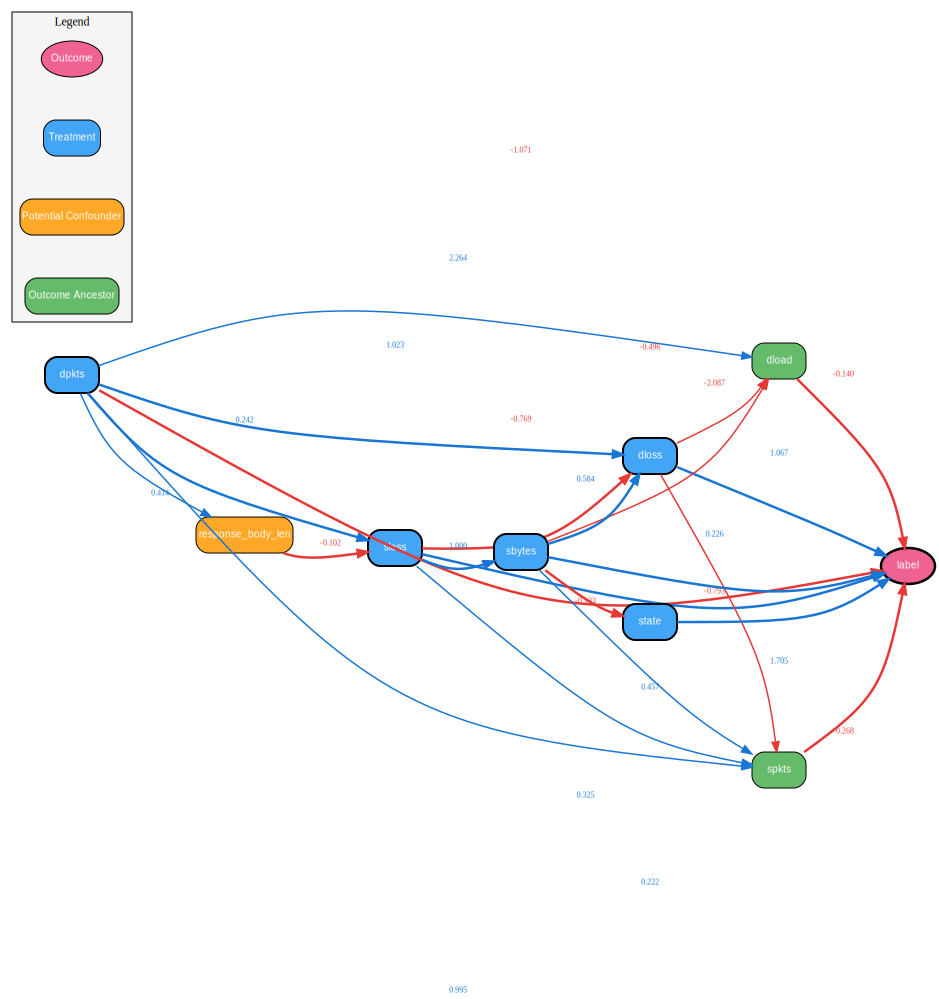


=== Analysis Summary ===
Total nodes in causal structure: 9
Total edges: 22
Outcome ancestors: 8
Treatment ancestors: 4
Potential confounders: 4

Potential confounders (affect both treatments and outcome):
  - dpkts
  - sbytes
  - response_body_len
  - sloss

Direct causes of each treatment:
  dpkts: []
  sloss: ['dpkts', 'response_body_len']
  dloss: ['dpkts', 'sbytes', 'sloss']
  state: ['sbytes']
  sbytes: ['sloss']

=== Variables for Causal Inference ===
Treatment variables: ['dpkts', 'sloss', 'dloss', 'state', 'sbytes']
Outcome: label
Potential confounders: ['dpkts', 'sbytes', 'response_body_len', 'sloss']


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import graphviz
from IPython.display import display
from collections import deque

def _build_graph(adjacency_matrix, feature_names, lower_limit):
    """Helper function to build a NetworkX directed graph from the adjacency matrix."""
    G = nx.DiGraph()
    for i, col_i in enumerate(feature_names):
        G.add_node(col_i)
        for j, col_j in enumerate(feature_names):
            weight = adjacency_matrix[i, j]
            # Add an edge only if the weight is above the specified lower limit
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight)  # j -> i
    return G

def _find_ancestors(graph, node_name, max_depth=None):
    """Find all ancestors of a node up to a specified depth using BFS."""
    ancestors = set()
    if node_name not in graph:
        return ancestors

    if max_depth is None:
        return nx.ancestors(graph, node_name)

    queue = deque([(node_name, 0)])
    visited = {node_name}

    while queue:
        current_node, depth = queue.popleft()
        if depth >= max_depth:
            continue

        for parent in graph.predecessors(current_node):
            if parent not in visited:
                ancestors.add(parent)
                visited.add(parent)
                queue.append((parent, depth + 1))
    return ancestors

def create_causal_graph(adjacency_matrix, feature_names, outcome_name,
                        treatment_vars=None, lower_limit=0.1, max_depth=None):
    """
    Creates and visualizes a causal graph focusing on the paths to a specified outcome
    and optional treatment variables.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        feature_names (list): A list of column names corresponding to the matrix.
        outcome_name (str): The name of the outcome variable to focus on.
        treatment_vars (list, optional): List of treatment variable names.
        lower_limit (float, optional): Edges with an absolute weight below this limit are pruned.
        max_depth (int, optional): Maximum depth to search for ancestors. None for unlimited.

    Returns:
        graphviz.Digraph: A Graphviz object representing the filtered graph.
        dict: A dictionary with analysis results (e.g., confounders, ancestors).
    """
    # Step 1: Build the full NetworkX graph
    G = _build_graph(adjacency_matrix, feature_names, lower_limit)

    # Step 2: Find ancestors for outcome and treatments
    outcome_ancestors = _find_ancestors(G, outcome_name, max_depth)
    treatment_ancestors = set()
    treatment_direct_causes = {}

    if treatment_vars:
        for treatment in treatment_vars:
            if treatment in G:
                treatment_ancestors.update(_find_ancestors(G, treatment, max_depth))
                treatment_direct_causes[treatment] = list(G.predecessors(treatment))

    # Step 3: Categorize all relevant nodes
    all_relevant_nodes = outcome_ancestors.union(treatment_ancestors).union({outcome_name})
    if treatment_vars:
        all_relevant_nodes.update(treatment_vars)

    node_categories = {}
    confounders = outcome_ancestors.intersection(treatment_ancestors)

    for node in all_relevant_nodes:
        if node == outcome_name:
            node_categories[node] = 'outcome'
        elif treatment_vars and node in treatment_vars:
            node_categories[node] = 'treatment'
        elif node in confounders:
            node_categories[node] = 'confounder'
        elif node in outcome_ancestors:
            node_categories[node] = 'outcome_ancestor'
        elif node in treatment_ancestors:
            node_categories[node] = 'treatment_ancestor'
        else:
            node_categories[node] = 'other'

    # Step 4: Create subgraph for visualization
    subgraph = G.subgraph(all_relevant_nodes)
    if not subgraph.nodes():
        print("No relevant nodes found for visualization.")
        return None, {}

    # Step 5: Define styling dictionaries
    node_styles = {
        'outcome': {'fillcolor': '#F06292', 'fontcolor': 'white', 'shape': 'ellipse', 'penwidth': '2.5'},
        'treatment': {'fillcolor': '#42A5F5', 'fontcolor': 'white', 'penwidth': '2.0'},
        'confounder': {'fillcolor': '#FFA726', 'fontcolor': 'white'},
        'outcome_ancestor': {'fillcolor': '#66BB6A', 'fontcolor': 'white'},
        'treatment_ancestor': {'fillcolor': '#26C6DA', 'fontcolor': 'black'},
        'other': {'fillcolor': '#E0E0E0', 'fontcolor': 'black'},
    }
    legend_styles = {
        'outcome': ('Outcome', '#F06292', 'white', 'ellipse'),
        'treatment': ('Treatment', '#42A5F5', 'white', 'box'),
        'confounder': ('Potential Confounder', '#FFA726', 'white', 'box'),
        'outcome_ancestor': ('Outcome Ancestor', '#66BB6A', 'white', 'box'),
        'treatment_ancestor': ('Treatment Ancestor', '#26C6DA', 'black', 'box'),
    }

    # Step 6: Create the Graphviz visualization
    dot = graphviz.Digraph(comment=f'Causal Structure for {outcome_name}', engine='dot')
    dot.attr('graph', rankdir='LR', splines='curved', overlap='false', nodesep='0.6', ranksep='0.75')
    dot.attr('node', shape='box', style='rounded,filled', fontname='Helvetica', fontsize='10', margin='0.08,0.05')
    dot.attr('edge', fontsize='8', arrowhead='normal', penwidth='1.5')

    for node, category in node_categories.items():
        style = node_styles.get(category, node_styles['other'])
        dot.node(node, node, **style)

    for u, v, data in subgraph.edges(data=True):
        weight = data['weight']
        edge_color = '#E53935' if weight < 0 else '#1976D2'
        label = f"{weight:.3f}"

        penwidth = '2.5' if v in [outcome_name] + (treatment_vars or []) else '1.5'

        dot.edge(u, v, label=label, color=edge_color, fontcolor=edge_color, penwidth=penwidth)

    # Step 7: Add a dynamic legend
    with dot.subgraph(name='cluster_legend') as legend:
        legend.attr(label='Legend', fontsize='12', style='filled', fillcolor='#F5F5F5')
        for key, (label, fillcolor, fontcolor, shape) in legend_styles.items():
            if key in node_categories.values():
                legend.node(f'leg_{key}', label, fillcolor=fillcolor, fontcolor=fontcolor, shape=shape)

    # Step 8: Prepare analysis results
    analysis_results = {
        'outcome_ancestors': list(outcome_ancestors),
        'treatment_ancestors': list(treatment_ancestors),
        'potential_confounders': list(confounders),
        'treatment_direct_causes': treatment_direct_causes,
        'total_nodes': len(subgraph.nodes()),
        'total_edges': len(subgraph.edges())
    }

    return dot, analysis_results

def identify_treatments_from_outcome_ancestors(adjacency_matrix, feature_names, outcome_name,
                                             lower_limit=0.1, min_outgoing=0):
    """
    Automatically identify treatment variables from the ancestors of the outcome.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        feature_names (list): A list of column names corresponding to the matrix.
        outcome_name (str): The name of the outcome variable.
        lower_limit (float): Minimum edge weight to consider significant.
        min_outgoing (int): Minimum number of outgoing edges for a treatment candidate.

    Returns:
        list: Potential treatment variables.
    """
    G = _build_graph(adjacency_matrix, feature_names, lower_limit)

    outcome_ancestors = _find_ancestors(G, outcome_name)
    treatment_candidates = []

    for node in outcome_ancestors:
        outgoing = len(list(G.successors(node)))
        incoming = len(list(G.predecessors(node)))

        if outgoing >= min_outgoing and incoming <= 3:
            treatment_candidates.append(node)

    return treatment_candidates


# ==== Enhanced usage example ====
# Load your data
adj_matrix = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

# Get feature names (make sure this matches your actual dataset)
feature_names = df.columns.to_list() # Replace with your actual feature names

# Example feature names for UNSW-NB15 (update these to match your actual features)
# This list is used for the example and must be correct for the graph to work
# feature_names = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login',
#                 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt',
#                 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label',
#                 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin',
#                 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl',
#                 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat',
#                 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm',
#                 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']

# Step 1: Automatically identify treatment variables from outcome ancestors
print("=== Identifying Treatment Variables ===")
treatment_vars = identify_treatments_from_outcome_ancestors(
    adj_matrix, feature_names, "label", lower_limit=0.15, min_outgoing=1
)
print(f"Identified treatment variables: {treatment_vars}")

# Step 2: Create comprehensive visualization
print("\n=== Creating Comprehensive Causal Visualization ===")
filtered_graph, analysis = create_causal_graph(
    adj_matrix, feature_names, "label",
    treatment_vars=treatment_vars,
    lower_limit=0.1,  # Lower threshold to capture more relationships
    max_depth=None    # Set to 2 or 3 if graph becomes too complex
)

# Step 3: Display results
if filtered_graph:
    display(filtered_graph)

    print(f"\n=== Analysis Summary ===")
    print(f"Total nodes in causal structure: {analysis['total_nodes']}")
    print(f"Total edges: {analysis['total_edges']}")
    print(f"Outcome ancestors: {len(analysis['outcome_ancestors'])}")
    print(f"Treatment ancestors: {len(analysis['treatment_ancestors'])}")
    print(f"Potential confounders: {len(analysis['potential_confounders'])}")

    print(f"\nPotential confounders (affect both treatments and outcome):")
    for conf in analysis['potential_confounders']:
        print(f"  - {conf}")

    print(f"\nDirect causes of each treatment:")
    for treatment, causes in analysis['treatment_direct_causes'].items():
        print(f"  {treatment}: {causes}")

# Step 4: Export for DoWhy (optional)
print(f"\n=== Variables for Causal Inference ===")
print(f"Treatment variables: {treatment_vars}")
print(f"Outcome: label")
print(f"Potential confounders: {analysis['potential_confounders'] if 'analysis' in locals() and analysis else 'Run visualization first'}")


## gteting cofounders

In [ ]:
import networkx as nx
import numpy as np

def find_treatments_indirect_confounders(adjacency_matrix, feature_names, outcome_name, lower_limit=1e-6):
    """
    From a LiNGAM adjacency matrix, find:
    - Treatments: direct parents of outcome
    - Indirect causes: other ancestors of outcome (excluding treatments)
    - Confounders: variables that cause both a treatment and the outcome
    """
    # Step 1: Build graph (LiNGAM: B_ij means i <- j)
    G = nx.DiGraph()
    for i, col_i in enumerate(feature_names):
        G.add_node(col_i)
        for j, col_j in enumerate(feature_names):
            weight = adjacency_matrix[i, j]
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight)  # j → i

    # Step 2: Treatments = direct parents of outcome
    treatments = list(G.predecessors(outcome_name))

    # Step 3: Indirect causes = other ancestors of outcome (excluding treatments)
    all_ancestors = nx.ancestors(G, outcome_name)
    indirect_causes = list(all_ancestors - set(treatments))

    # Step 4: Confounders = nodes that are ancestors of both a treatment and the outcome
    confounders = set()
    ancestors_outcome = nx.ancestors(G, outcome_name)
    for t in treatments:
        ancestors_t = nx.ancestors(G, t)
        confounders.update(ancestors_t & ancestors_outcome)

    # Step 5: Remove treatments & outcome from confounders
    confounders = list(confounders - set(treatments) - {outcome_name})

    return {
        "treatments": treatments,
        "indirect_causes": indirect_causes,
        "confounders": confounders
    }


# ==== Example usage ====
labels = list(df.columns)
adj = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

results = find_treatments_indirect_confounders(adj, labels, "label", lower_limit=1e-6)

print("Possible treatments:", results["treatments"])
print("Possible indirect causes:", results["indirect_causes"])
print("Possible confounders:", results["confounders"])


Possible treatments: ['dur', 'state', 'spkts', 'dpkts', 'sbytes', 'dload', 'sloss', 'dloss', 'dinpkt', 'djit', 'trans_depth', 'response_body_len', 'ct_ftp_cmd', 'is_sm_ips_ports']
Possible indirect causes: ['sjit', 'is_ftp_login', 'sinpkt']
Possible confounders: ['sjit', 'is_ftp_login', 'sinpkt']


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


Focusing on treatment variable: proto
Possible treatments: ['proto', 'state']
Possible indirect causes: ['sbytes', 'response_body_len', 'sloss', 'dpkts']
Possible confounders: ['sbytes', 'response_body_len', 'sloss', 'dpkts']


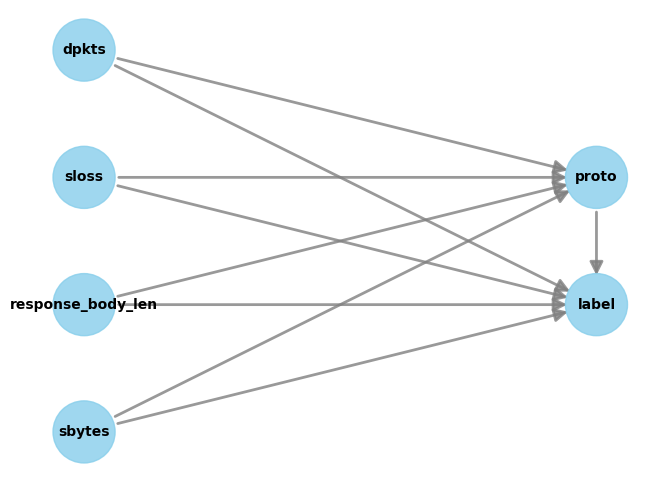

In [ ]:
import dowhy
from dowhy import CausalModel

def build_dowhy_model_from_lingam(adj_matrix, feature_names, outcome_name, lower_limit=1e-6):
    # Step 1: Get treatments, indirect causes, and confounders
    results = find_treatments_indirect_confounders(
        adj_matrix, feature_names, outcome_name, lower_limit
    )
    treatments = results["treatments"]
    indirect_causes = results["indirect_causes"]
    confounders = results["confounders"]

    if not treatments:
        raise ValueError(f"No treatments found for outcome '{outcome_name}'. Cannot build model.")

    # Step 2: Pick one treatment to focus on (could loop later for all)
    treatment_var = treatments[0]

    # Step 3: Build a basic causal graph in DOT format
    edges = []
    # Confounders → treatment & outcome
    for c in confounders:
        edges.append(f"{c} -> {treatment_var}")
        edges.append(f"{c} -> {outcome_name}")
    # Treatment → outcome
    edges.append(f"{treatment_var} -> {outcome_name}")
    # Indirect causes (non-confounders) → treatment or outcome
    for ic in indirect_causes:
        edges.append(f"{ic} -> {outcome_name}")

    # Create DOT graph
    nodes = set([treatment_var, outcome_name] + confounders + indirect_causes)
    dot_graph = "digraph { " + "; ".join(edges) + " }"

    # Step 4: Build DoWhy model
    model = CausalModel(
        data=df[list(nodes)],  # restrict to relevant variables
        graph=dot_graph.replace("\n", " "),
        treatment=treatment_var,
        outcome=outcome_name
    )

    return model, treatment_var, results


# ==== Example usage ====
labels = list(df.columns)
adj = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

model, treatment_var, results = build_dowhy_model_from_lingam(
    adj, labels, "label", lower_limit=0.1
)

print(f"Focusing on treatment variable: {treatment_var}")
print("Possible treatments:", results["treatments"])
print("Possible indirect causes:", results["indirect_causes"])
print("Possible confounders:", results["confounders"])

# View causal graph
model.view_model()


#### automating analysis

In [ ]:
import pandas as pd
from dowhy import CausalModel
from pathlib import Path
import numpy as np
import warnings
from pathlib import Path

# Suppress some common warnings for cleaner output
warnings.filterwarnings('ignore')

def find_potential_causes_of_outcome(adj_matrix, feature_names, outcome_var, threshold=0.1):
    """
    Find variables that could potentially cause the outcome based on causal paths

    Since the outcome is not in the adjacency matrix, we use domain knowledge
    and causal structure to identify variables that likely affect network behavior
    and thus the label (malicious/benign)

    Parameters:
    adj_matrix: numpy array - adjacency matrix
    feature_names: list - feature names
    outcome_var: str - outcome variable name
    threshold: float - minimum absolute value to consider as causal relationship

    Returns:
    list: variables that could potentially cause the outcome
    """

    # For network security, these variables are most likely to directly affect
    # whether traffic is classified as malicious or benign
    # direct_outcome_causes = [
    #     'total_entropy',  # Entropy patterns differ between malicious/benign
    #     'entropy',        # Basic entropy measure
    #     'bytes_out',      # Outbound data volume
    #     'bytes_in',       # Inbound data volume
    #     'num_pkts_out',   # Packet count patterns
    #     'num_pkts_in',    # Packet count patterns
    #     'duration',       # Connection duration
    #     'avg_ipt',        # Inter-packet timing
    #     'proto',          # Protocol type
    #     'dest_port',      # Destination port (some ports more suspicious)
    #     'src_port'        # Source port
    # ]

    # Find variables that have high causal influence (affect many other variables)
    # These are also likely to affect the outcome
    influential_vars = []
    for i, var_name in enumerate(feature_names):
        outgoing_edges = np.sum(np.abs(adj_matrix[i, :]) > threshold)
        if outgoing_edges >= 2:  # Variables that affect multiple others
            influential_vars.append(var_name)

    # Combine direct causes and influential variables
    # potential_causes = []
    # for var in direct_outcome_causes + influential_vars:
    #     if var in feature_names:
    #         potential_causes.append(var)

    # # Remove duplicates while preserving order
    # potential_causes = list(dict.fromkeys(potential_causes))

    return list(dict.fromkeys(influential_vars))


def find_confounders(adj_matrix, feature_names, treatment_idx, outcome_var=None):
    """
    Find confounders for a given treatment based on the adjacency matrix

    A confounder is a variable that:
    1. Causes the treatment (has a path to treatment)
    2. Causes the outcome (either directly or through other variables)

    Parameters:
    adj_matrix: numpy array - adjacency matrix from DirectLiNGAM
    feature_names: list - names of features
    treatment_idx: int - index of treatment variable
    outcome_var: str - outcome variable name

    Returns:
    list: names of confounding variables
    """
    n_vars = len(feature_names)
    confounders = []
    treatment_name = feature_names[treatment_idx]

    # Find variables that cause the treatment (direct parents)
    treatment_parents = []
    for i in range(n_vars):
        if adj_matrix[i, treatment_idx] != 0:
            treatment_parents.append(feature_names[i])

    # Find variables that could potentially cause the outcome
    if outcome_var:
        potential_outcome_causes = find_potential_causes_of_outcome(
            adj_matrix, feature_names, outcome_var
        )

        # A confounder must cause both treatment AND outcome
        # So we find the intersection of treatment parents and potential outcome causes
        for parent in treatment_parents:
            if parent in potential_outcome_causes and parent != treatment_name:
                confounders.append(parent)

        # Also include highly influential variables that are not the treatment itself
        for i in range(n_vars):
            var_name = feature_names[i]
            if var_name == treatment_name:
                continue

            outgoing_edges = np.sum(adj_matrix[i, :] != 0)
            # Variables with high influence that could affect both treatment and outcome
            if (outgoing_edges >= 3 and
                var_name in potential_outcome_causes and
                var_name not in confounders):
                confounders.append(var_name)
    else:
        # Fallback: just use treatment parents
        confounders = treatment_parents

    return confounders

def find_treatment_variables_for_outcome(adj_matrix, feature_names, outcome_var=None, threshold=0.1):
    """
    Identify potential treatment variables that can causally affect the outcome

    Since the outcome (label) is not in the adjacency matrix, we identify treatments based on:
    1. Variables that have causal influence on other variables (can propagate effects)
    2. Variables that are not purely determined by others (have some exogenous variation)
    3. Variables that are substantively meaningful for the outcome

    For network security data, good treatments typically affect network behavior patterns

    Parameters:
    adj_matrix: numpy array - adjacency matrix
    feature_names: list - feature names
    outcome_var: str - outcome variable name (for context)
    threshold: float - minimum absolute value to consider as causal relationship

    Returns:
    list: potential treatment variable names that could affect the outcome
    """
    n_vars = len(feature_names)
    treatments = []

    # Network security specific treatment priorities
    # These are typically variables that represent measurable network behaviors
    # priority_treatments = [
    #     'total_entropy', 'entropy', 'bytes_out', 'bytes_in',
    #     'num_pkts_out', 'num_pkts_in', 'duration', 'avg_ipt'
    # ]

    for i, var_name in enumerate(feature_names):
        # Count incoming and outgoing causal relationships
        incoming = np.sum(np.abs(adj_matrix[:, i]) > threshold)
        outgoing = np.sum(np.abs(adj_matrix[i, :]) > threshold)

        # Criteria for good treatment variables:
        # 1. Have some outgoing edges (can influence other variables)
        # 2. Not purely determined (have some incoming but not too many)
        # 3. Prioritize substantively meaningful variables

        is_good_structure = outgoing >= 1 and incoming <= 3
        #is_priority_var = var_name in priority_treatments

        # Include if it has good causal structure OR is a priority variable
        if is_good_structure:
            treatments.append(var_name)

    # Remove duplicates while preserving order
    treatments = list(dict.fromkeys(treatments))

    return treatments

def find_treatment_variables(adj_matrix, feature_names, threshold=0.1):
    """
    General treatment variable finder (kept for backward compatibility)
    Now calls the outcome-specific version
    """
    return find_treatment_variables_for_outcome(adj_matrix, feature_names, threshold=threshold)

def adjacency_matrix_to_gml(adj_matrix, feature_names, outcome_var=None, confounders=None):
    """
    Convert adjacency matrix from DirectLiNGAM to GML format for DoWhy

    Parameters:
    adj_matrix: numpy array - adjacency matrix from DirectLiNGAM
    feature_names: list - names of features corresponding to matrix indices
    outcome_var: str - outcome variable name (if not in feature_names)
    confounders: list - list of confounder variables for the outcome

    Returns:
    str: GML formatted graph string
    """
    # Clean variable names (remove special characters that might cause issues)
    def clean_name(name):
        return str(name).replace(" ", "_").replace("-", "_").replace(".", "_")

    # Start building the GML graph
    gml_lines = ["graph [", "  directed 1"]

    all_nodes = set()

    # Add nodes for all features
    for feature in feature_names:
        clean_feature = clean_name(feature)
        if clean_feature not in all_nodes:
            gml_lines.append(f'  node [ id "{clean_feature}" label "{clean_feature}" ]')
            all_nodes.add(clean_feature)
        #gml_lines.append(f'  node [ id "{feature}" label "{feature}" ]')

    # Add outcome node if specified and not already in features
    if outcome_var and outcome_var not in feature_names:
        clean_outcome = clean_name(outcome_var)
        if clean_outcome not in all_nodes:
            gml_lines.append(f'  node [ id "{clean_outcome}" label "{clean_outcome}" ]')
            all_nodes.add(clean_outcome)
        #gml_lines.append(f'  node [ id "{outcome_var}" label "{outcome_var}" ]')

    # Add edges based on adjacency matrix
    edges_added = set()  # Track edges to avoid duplicates
    for i, source in enumerate(feature_names):
        for j, target in enumerate(feature_names):
            if adj_matrix[i, j] != 0:  # Non-zero indicates causal relationship
                clean_source = clean_name(source)
                clean_target = clean_name(target)
                edge_key = (clean_source, clean_target)

                if edge_key not in edges_added:
                    gml_lines.append(f'  edge [ source "{clean_source}" target "{clean_target}" ]')
                    edges_added.add(edge_key)

    # If outcome variable is specified, add edges from confounders
    if outcome_var and outcome_var not in feature_names and confounders:
        clean_outcome = clean_name(outcome_var)
        for confounder in confounders:
            if confounder in feature_names:
                clean_confounder = clean_name(confounder)
                edge_key = (clean_confounder, clean_outcome)

                if edge_key not in edges_added:
                    gml_lines.append(f'  edge [ source "{clean_confounder}" target "{clean_outcome}" ]')
                    edges_added.add(edge_key)

    gml_lines.append("]")

    # Validate the GML syntax before returning
    gml_string = "\n".join(gml_lines)

    # Basic validation - check for common syntax issues
    if gml_string.count('[') != gml_string.count(']'):
        print("Warning: Mismatched brackets in GML string")

    return gml_string

# Set up paths - UPDATE THESE PATHS TO YOUR NEW DATASET
save_dir = Path('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference')
output_file = save_dir / 'causal_inference_results.csv'

# Load your new dataset - UPDATE THIS PATH
df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_freq_scaled.csv')

# Load the adjacency matrix from DirectLiNGAM - UPDATE THIS PATH
# Assuming you saved it as a numpy array or CSV
adjacency_matrix = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()  # OR np.loadtxt('adjacency_matrix.csv', delimiter=',')

# Define feature names that correspond to the adjacency matrix
# UPDATE THESE TO MATCH YOUR ACTUAL FEATURE NAMES FROM CAUSAL DISCOVERY
feature_names = df.columns.tolist()

# Create binary outcomes for the label (assuming binary classification)
# UPDATE THESE BASED ON YOUR ACTUAL LABEL ENCODING
# if 'label' in df.columns:
#     df['is_malicious'] = (df['label'] == 1).astype(int)  # Assuming 1 = malicious
#     df['is_benign'] = (df['label'] == 0).astype(int)     # Assuming 0 = benign
# elif 'label_encoded' in df.columns:
#     df['is_malicious'] = (df['label_encoded'] == 1).astype(int)
#     df['is_benign'] = (df['label_encoded'] == 0).astype(int)
# else:
#     print("Warning: No 'label' or 'label_encoded' column found. Please check your dataset.")

# Automatically identify treatment variables from adjacency matrix
print("=== Identifying Treatment Variables from Causal Structure ===")
treatment_vars = find_treatment_variables(adjacency_matrix, feature_names, threshold=0.1)
print(f"Identified treatment variables: {treatment_vars}")

# Define outcome variables (these are your binary classification targets)
outcome_vars = ['label']
print(f"Outcome variables: {outcome_vars}")

# Validate that treatment variables exist in your dataset
treatment_vars = [t for t in treatment_vars if t in df.columns]
print(f"Available treatment variables in dataset: {treatment_vars}")

if not treatment_vars:
    print("Warning: No treatment variables found in dataset. Using fallback variables.")
    # Fallback to commonly important variables if auto-detection fails
    fallback_treatments = ['total_entropy', 'num_pkts_in', 'num_pkts_out', 'bytes_out', 'duration']
    treatment_vars = [t for t in fallback_treatments if t in df.columns]
    print(f"Using fallback treatment variables: {treatment_vars}")

# Initialize results list for CSV
results = []

# Loop through each treatment and outcome combination
for outcome in outcome_vars:
    for treatment in treatment_vars:
        print(f"\n### Analyzing Treatment: {treatment} ➝ Outcome: {outcome} ###")

        try:
            # Find confounders for this specific treatment-outcome pair
            treatment_idx = feature_names.index(treatment)
            confounders = find_confounders(adjacency_matrix, feature_names, treatment_idx, outcome)
            print(f"Identified confounders for {treatment}: {confounders}")

            # Create GML graph from adjacency matrix with identified confounders
            gml_graph = adjacency_matrix_to_gml(
                adj_matrix=adjacency_matrix,
                feature_names=feature_names,
                outcome_var=outcome,
                confounders=confounders
            )

            # Clean treatment and outcome names for consistency
            clean_treatment = str(treatment).replace(" ", "_").replace("-", "_").replace(".", "_")
            clean_outcome = str(outcome).replace(" ", "_").replace("-", "_").replace(".", "_")

            # Add direct treatment -> outcome edge (ensure it's properly formatted)
            treatment_to_outcome_edge = f'  edge [ source "{clean_treatment}" target "{clean_outcome}" ]'
            gml_graph = gml_graph.replace(
                "]",
                f'{treatment_to_outcome_edge}\n]'
            )

            print("Generated GML Graph (first 800 chars):")
            print(gml_graph[:800] + "..." if len(gml_graph) > 800 else gml_graph)
            print()

            # Validate GML before creating model
            try:
                # Try to create a simple validation by checking basic structure
                lines = gml_graph.split('\n')
                if not lines[0].strip().startswith('graph'):
                    raise ValueError("GML must start with 'graph ['")
                if not lines[-1].strip() == ']':
                    raise ValueError("GML must end with ']'")

                print("GML syntax validation passed")

            except Exception as gml_error:
                print(f"GML validation failed: {gml_error}")
                print("Attempting to use simplified graph...")

                # Create a minimal graph as fallback
                clean_treatment = str(treatment).replace(" ", "_").replace("-", "_").replace(".", "_")
                clean_outcome = str(outcome).replace(" ", "_").replace("-", "_").replace(".", "_")


            # Build the model
            model = CausalModel(
                data=df,
                treatment=treatment,
                outcome=outcome,
                graph=gml_graph
            )

            # Optional: Visualize the graph
            try:
                model.view_model(layout="dot")
            except Exception as viz_error:
                print(f"Graph visualization failed: {viz_error}")

            # Step-2: Identify the causal effect
            identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print("Step-2: Identified Estimand")
            print(identified_estimand)

            # Step-3: Estimate the identified estimand
            estimate = model.estimate_effect(
                identified_estimand,
                method_name="backdoor.linear_regression",
                target_units="ate"
            )
            print("\nStep-3: Causal Estimate")
            print(estimate)

            # Extract conditional estimates if available
            conditional_estimates = getattr(estimate, 'conditional_estimates', None)
            conditional_str = ""
            if conditional_estimates is not None:
                conditional_str = str(conditional_estimates).replace('\n', '; ')

            # Step-4: Refute results
            refute_random = model.refute_estimate(
                identified_estimand, estimate, method_name="random_common_cause"
            )
            print("\nStep-4: Refutation 1 - Random Common Cause")
            print(refute_random)

            refute_placebo = model.refute_estimate(
                identified_estimand, estimate, method_name="placebo_treatment_refuter",
                placebo_type="permute"
            )
            print("\nStep-4: Refutation 2 - Placebo Treatment")
            print(refute_placebo)

            refute_subset = model.refute_estimate(
                identified_estimand, estimate, method_name="data_subset_refuter",
                subset_fraction=0.8
            )
            print("\nStep-4: Refutation 3 - Data Subset")
            print(refute_subset)

            # Store results
            result = {
                'Treatment': treatment,
                'Outcome': outcome,
                'Confounders': ', '.join(confounders),
                'ATE': estimate.value,
                'Conditional_Estimates': conditional_str,
                'Results_Estimate': str(estimate),
                'Random_Common_Cause_New_Effect': refute_random.new_effect,
                'Random_Common_Cause_p_value': refute_random.refutation_result.get('p_value', np.nan),
                'Placebo_Treatment_New_Effect': refute_placebo.new_effect,
                'Placebo_Treatment_p_value': refute_placebo.refutation_result.get('p_value', np.nan),
                'Data_Subset_New_Effect': refute_subset.new_effect,
                'Data_Subset_p_value': refute_subset.refutation_result.get('p_value', np.nan)
            }
            results.append(result)

        except Exception as e:
            print(f"Failed to analyze {treatment} ➝ {outcome}: {e}")
            results.append({
                'Treatment': treatment,
                'Outcome': outcome,
                'Confounders': '',
                'ATE': np.nan,
                'Conditional_Estimates': '',
                'Results_Estimate': str(e),
                'Random_Common_Cause_New_Effect': np.nan,
                'Random_Common_Cause_p_value': np.nan,
                'Placebo_Treatment_New_Effect': np.nan,
                'Placebo_Treatment_p_value': np.nan,
                'Data_Subset_New_Effect': np.nan,
                'Data_Subset_p_value': np.nan
            })

# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv(output_file, index=False)
print(f"\nResults saved to {output_file}")

# Optional: Print summary statistics
print("\n=== SUMMARY ===")
print(f"Total analyses conducted: {len(results_df)}")
print(f"Successful analyses: {len(results_df[results_df['ATE'].notna()])}")
print("\nAverage Treatment Effects:")
for treatment in treatment_vars:
    treatment_results = results_df[results_df['Treatment'] == treatment]
    avg_ate = treatment_results['ATE'].mean()
    print(f"{treatment}: {avg_ate:.6f}")

# Print adjacency matrix analysis
print(f"\n=== ADJACENCY MATRIX ANALYSIS ===")
print(f"Matrix shape: {adjacency_matrix.shape}")
print(f"Number of causal relationships: {np.sum(adjacency_matrix != 0)}")
print(f"Sparsity: {(np.sum(adjacency_matrix == 0) / adjacency_matrix.size * 100):.1f}%")

# Print most influential variables (highest number of outgoing edges)
outgoing_edges = np.sum(adjacency_matrix != 0, axis=1)
influential_vars = [(feature_names[i], outgoing_edges[i]) for i in np.argsort(outgoing_edges)[::-1][:5]]
print(f"\nMost influential variables (by outgoing edges):")
for var, count in influential_vars:
    print(f"  {var}: {count} outgoing edges")

=== Identifying Treatment Variables from Causal Structure ===
Identified treatment variables: ['dur', 'service', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'stcpb', 'dtcpb', 'tcprtt', 'smean', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']
Outcome variables: ['label']
Available treatment variables in dataset: ['dur', 'service', 'dbytes', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'dinpkt', 'sjit', 'stcpb', 'dtcpb', 'tcprtt', 'smean', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']

### Analyzing Treatment: dur ➝ Outcome: label ###
Identified confounders for dur: ['service', 'spkts', 'rate', 'sttl', 'dttl', 'sload', 'sinpkt', 'stcpb', 'dtcpb', 

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from dowhy import CausalModel
from pathlib import Path
import numpy as np
import warnings
from pathlib import Path

# Suppress some common warnings for cleaner output
warnings.filterwarnings('ignore')

def find_confounders(adj_matrix, feature_names, treatment_idx, outcome_var=None):
    """
    Find confounders for a given treatment based on the adjacency matrix

    A confounder is a variable that:
    1. Causes the treatment (has a path to treatment)
    2. Causes the outcome (either directly or through other variables)

    Parameters:
    adj_matrix: numpy array - adjacency matrix from DirectLiNGAM
    feature_names: list - names of features
    treatment_idx: int - index of treatment variable
    outcome_var: str - outcome variable name

    Returns:
    list: names of confounding variables
    """
    n_vars = len(feature_names)
    confounders = []

    # Find variables that cause the treatment (direct parents)
    treatment_parents = []
    for i in range(n_vars):
        if adj_matrix[i, treatment_idx] != 0:
            treatment_parents.append(i)

    # A confounder must be a parent of treatment and also affect the outcome
    # Since outcome is binary and external, we consider all parents of treatment as potential confounders
    for parent_idx in treatment_parents:
        confounders.append(feature_names[parent_idx])

    # Also include variables that have strong causal influence (many outgoing edges)
    # These are likely to be common causes
    for i in range(n_vars):
        outgoing_edges = np.sum(adj_matrix[i, :] != 0)
        if outgoing_edges >= 3 and feature_names[i] not in confounders:  # Threshold for "influential"
            confounders.append(feature_names[i])

    return confounders

def find_treatment_variables(adj_matrix, feature_names, threshold=0.1):
    """
    Identify potential treatment variables based on causal structure

    Good treatment variables typically:
    1. Have some incoming causal relationships (can be intervened upon)
    2. Have outgoing relationships (can affect other variables)
    3. Are not purely intermediate variables

    Parameters:
    adj_matrix: numpy array - adjacency matrix
    feature_names: list - feature names
    threshold: float - minimum absolute value to consider as causal relationship

    Returns:
    list: potential treatment variable names
    """
    n_vars = len(feature_names)
    treatments = []

    for i, var_name in enumerate(feature_names):
        # Count incoming and outgoing causal relationships
        incoming = np.sum(np.abs(adj_matrix[:, i]) > threshold)
        outgoing = np.sum(np.abs(adj_matrix[i, :]) > threshold)

        # Good treatment candidates:
        # - Have moderate incoming edges (can be manipulated)
        # - Have outgoing edges (can affect outcomes)
        # - Are not purely leaf nodes or purely root nodes
        if incoming >= 1 and outgoing >= 1 and incoming <= 4:
            treatments.append(var_name)

    return treatments

def adjacency_matrix_to_gml(adj_matrix, feature_names, outcome_var=None, confounders=None):
    """
    Convert adjacency matrix from DirectLiNGAM to GML format for DoWhy

    Parameters:
    adj_matrix: numpy array - adjacency matrix from DirectLiNGAM
    feature_names: list - names of features corresponding to matrix indices
    outcome_var: str - outcome variable name (if not in feature_names)
    confounders: list - list of confounder variables for the outcome

    Returns:
    str: GML formatted graph string
    """

    # Start building the GML graph
    gml_lines = ["graph [", "  directed 1"]

    # Add nodes for all features
    for feature in feature_names:
        gml_lines.append(f'  node [ id "{feature}" label "{feature}" ]')

    # Add outcome node if specified and not already in features
    if outcome_var and outcome_var not in feature_names:
        gml_lines.append(f'  node [ id "{outcome_var}" label "{outcome_var}" ]')

    # Add edges based on adjacency matrix
    for i, source in enumerate(feature_names):
        for j, target in enumerate(feature_names):
            if adj_matrix[i, j] != 0:  # Non-zero indicates causal relationship
                gml_lines.append(f'  edge [ source "{source}" target "{target}" ]')

    # If outcome variable is specified, add edges from confounders
    if outcome_var and outcome_var not in feature_names and confounders:
        for confounder in confounders:
            if confounder in feature_names:
                gml_lines.append(f'  edge [ source "{confounder}" target "{outcome_var}" ]')

    gml_lines.append("]")
    return "\n".join(gml_lines)

# Set up paths - UPDATE THESE PATHS TO YOUR NEW DATASET
save_dir = Path('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference')
output_file = save_dir / 'causal_inference_results.csv'

# Load your new dataset - UPDATE THIS PATH
df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_freq_scaled.csv')

# Load the adjacency matrix from DirectLiNGAM - UPDATE THIS PATH
# Assuming you saved it as a numpy array or CSV
adjacency_matrix = pd.read_csv("/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv", index_col=0).to_numpy()  # OR np.loadtxt('adjacency_matrix.csv', delimiter=',')

# Define feature names that correspond to the adjacency matrix
# UPDATE THESE TO MATCH YOUR ACTUAL FEATURE NAMES FROM CAUSAL DISCOVERY
feature_names = df.columns.tolist()

# Create binary outcomes for the label (assuming binary classification)
# UPDATE THESE BASED ON YOUR ACTUAL LABEL ENCODING
# if 'label' in df.columns:
#     df['is_malicious'] = (df['label'] == 1).astype(int)  # Assuming 1 = malicious
#     df['is_benign'] = (df['label'] == 0).astype(int)     # Assuming 0 = benign
# elif 'label_encoded' in df.columns:
#     df['is_malicious'] = (df['label_encoded'] == 1).astype(int)
#     df['is_benign'] = (df['label_encoded'] == 0).astype(int)
# else:
#     print("Warning: No 'label' or 'label_encoded' column found. Please check your dataset.")

# Automatically identify treatment variables from adjacency matrix
print("=== Identifying Treatment Variables from Causal Structure ===")
treatment_vars = find_treatment_variables(adjacency_matrix, feature_names, threshold=0.1)
print(f"Identified treatment variables: {treatment_vars}")

# Define outcome variables (these are your binary classification targets)
outcome_vars = ['label']
print(f"Outcome variables: {outcome_vars}")

# Validate that treatment variables exist in your dataset
treatment_vars = [t for t in treatment_vars if t in df.columns]
print(f"Available treatment variables in dataset: {treatment_vars}")

if not treatment_vars:
    print("Warning: No treatment variables found in dataset. Using fallback variables.")
    # Fallback to commonly important variables if auto-detection fails
    fallback_treatments = ['total_entropy', 'num_pkts_in', 'num_pkts_out', 'bytes_out', 'duration']
    treatment_vars = [t for t in fallback_treatments if t in df.columns]
    print(f"Using fallback treatment variables: {treatment_vars}")

# Initialize results list for CSV
results = []

# Loop through each treatment and outcome combination
for outcome in outcome_vars:
    for treatment in treatment_vars:
        print(f"\n### Analyzing Treatment: {treatment} ➝ Outcome: {outcome} ###")

        try:
            # Find confounders for this specific treatment-outcome pair
            treatment_idx = feature_names.index(treatment)
            confounders = find_confounders(adjacency_matrix, feature_names, treatment_idx, outcome)
            print(f"Identified confounders for {treatment}: {confounders}")

            # Create GML graph from adjacency matrix with identified confounders
            gml_graph = adjacency_matrix_to_gml(
                adj_matrix=adjacency_matrix,
                feature_names=feature_names,
                outcome_var=outcome,
                confounders=confounders
            )

            # Add direct treatment -> outcome edge
            gml_graph = gml_graph.replace(
                "]",
                f'  edge [ source "{treatment}" target "{outcome}" ]\n]'
            )

            print("Generated GML Graph (first 500 chars):")
            print(gml_graph[:500] + "..." if len(gml_graph) > 500 else gml_graph)

            # Build the model
            model = CausalModel(
                data=df,
                treatment=treatment,
                outcome=outcome,
                graph=gml_graph
            )

            # Optional: Visualize the graph
            try:
                model.view_model(layout="dot")
            except Exception as viz_error:
                print(f"Graph visualization failed: {viz_error}")

            # Step-2: Identify the causal effect
            identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
            print("Step-2: Identified Estimand")
            print(identified_estimand)

            # Step-3: Estimate the identified estimand
            estimate = model.estimate_effect(
                identified_estimand,
                method_name="backdoor.linear_regression",
                target_units="ate"
            )
            print("\nStep-3: Causal Estimate")
            print(estimate)

            # Extract conditional estimates if available
            conditional_estimates = getattr(estimate, 'conditional_estimates', None)
            conditional_str = ""
            if conditional_estimates is not None:
                conditional_str = str(conditional_estimates).replace('\n', '; ')

            # Step-4: Refute results
            refute_random = model.refute_estimate(
                identified_estimand, estimate, method_name="random_common_cause"
            )
            print("\nStep-4: Refutation 1 - Random Common Cause")
            print(refute_random)

            refute_placebo = model.refute_estimate(
                identified_estimand, estimate, method_name="placebo_treatment_refuter",
                placebo_type="permute"
            )
            print("\nStep-4: Refutation 2 - Placebo Treatment")
            print(refute_placebo)

            refute_subset = model.refute_estimate(
                identified_estimand, estimate, method_name="data_subset_refuter",
                subset_fraction=0.8
            )
            print("\nStep-4: Refutation 3 - Data Subset")
            print(refute_subset)

            # Store results
            result = {
                'Treatment': treatment,
                'Outcome': outcome,
                'Confounders': ', '.join(confounders),
                'ATE': estimate.value,
                'Conditional_Estimates': conditional_str,
                'Results_Estimate': str(estimate),
                'Random_Common_Cause_New_Effect': refute_random.new_effect,
                'Random_Common_Cause_p_value': refute_random.refutation_result.get('p_value', np.nan),
                'Placebo_Treatment_New_Effect': refute_placebo.new_effect,
                'Placebo_Treatment_p_value': refute_placebo.refutation_result.get('p_value', np.nan),
                'Data_Subset_New_Effect': refute_subset.new_effect,
                'Data_Subset_p_value': refute_subset.refutation_result.get('p_value', np.nan)
            }
            results.append(result)

        except Exception as e:
            print(f"Failed to analyze {treatment} ➝ {outcome}: {e}")
            results.append({
                'Treatment': treatment,
                'Outcome': outcome,
                'Confounders': '',
                'ATE': np.nan,
                'Conditional_Estimates': '',
                'Results_Estimate': str(e),
                'Random_Common_Cause_New_Effect': np.nan,
                'Random_Common_Cause_p_value': np.nan,
                'Placebo_Treatment_New_Effect': np.nan,
                'Placebo_Treatment_p_value': np.nan,
                'Data_Subset_New_Effect': np.nan,
                'Data_Subset_p_value': np.nan
            })

# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv(output_file, index=False)
print(f"\nResults saved to {output_file}")

# Optional: Print summary statistics
print("\n=== SUMMARY ===")
print(f"Total analyses conducted: {len(results_df)}")
print(f"Successful analyses: {len(results_df[results_df['ATE'].notna()])}")
print("\nAverage Treatment Effects:")
for treatment in treatment_vars:
    treatment_results = results_df[results_df['Treatment'] == treatment]
    avg_ate = treatment_results['ATE'].mean()
    print(f"{treatment}: {avg_ate:.6f}")

# Print adjacency matrix analysis
print(f"\n=== ADJACENCY MATRIX ANALYSIS ===")
print(f"Matrix shape: {adjacency_matrix.shape}")
print(f"Number of causal relationships: {np.sum(adjacency_matrix != 0)}")
print(f"Sparsity: {(np.sum(adjacency_matrix == 0) / adjacency_matrix.size * 100):.1f}%")

# Print most influential variables (highest number of outgoing edges)
outgoing_edges = np.sum(adjacency_matrix != 0, axis=1)
influential_vars = [(feature_names[i], outgoing_edges[i]) for i in np.argsort(outgoing_edges)[::-1][:5]]
print(f"\nMost influential variables (by outgoing edges):")
for var, count in influential_vars:
    print(f"  {var}: {count} outgoing edges")

## all lines to label

Found all causal paths to 'label':

--- Paths originating from 'dpkts': ---
dpkts -> spkts -> label
dpkts -> dload -> label
dpkts -> sloss -> spkts -> label
dpkts -> sloss -> sbytes -> state -> label
dpkts -> sloss -> sbytes -> spkts -> label
dpkts -> sloss -> sbytes -> dload -> label
dpkts -> sloss -> sbytes -> dloss -> spkts -> label
dpkts -> sloss -> sbytes -> dloss -> dload -> label
dpkts -> sloss -> sbytes -> dloss -> label
dpkts -> sloss -> sbytes -> label
dpkts -> sloss -> dloss -> spkts -> label
dpkts -> sloss -> dloss -> dload -> label
dpkts -> sloss -> dloss -> label
dpkts -> sloss -> label
dpkts -> dloss -> spkts -> label
dpkts -> dloss -> dload -> label
dpkts -> dloss -> label
dpkts -> response_body_len -> sloss -> spkts -> label
dpkts -> response_body_len -> sloss -> sbytes -> state -> label
dpkts -> response_body_len -> sloss -> sbytes -> spkts -> label
dpkts -> response_body_len -> sloss -> sbytes -> dload -> label
dpkts -> response_body_len -> sloss -> sbytes -> dloss -

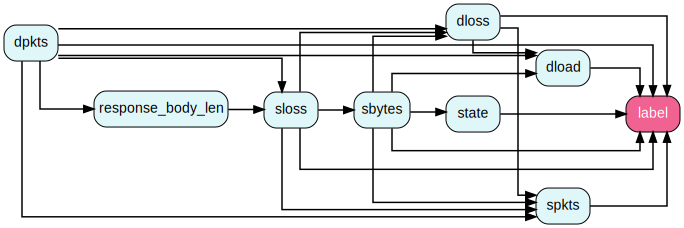

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
from IPython.display import display

def find_all_causal_paths(adjacency_matrix, feature_names, outcome_name, lower_limit=1e-6):
    """
    Finds all possible simple causal paths leading to a specified outcome node.

    A path is a sequence of nodes where each node is a direct cause of the next.
    A simple path does not repeat any nodes.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        feature_names (list): A list of column names corresponding to the matrix.
        outcome_name (str): The name of the outcome variable to find paths to.
        lower_limit (float, optional): Edges with an absolute weight below this limit
                                       are pruned. Defaults to 1e-6.

    Returns:
        dict: A dictionary where keys are the starting nodes of the paths and
              values are lists of all simple paths found from that node to the outcome.
    """
    # Step 1: Build a NetworkX directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, col_i in enumerate(feature_names):
        G.add_node(col_i)
        for j, col_j in enumerate(feature_names):
            weight = adjacency_matrix[i, j]
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight) # j -> i

    # Check if the outcome node exists in the graph
    if outcome_name not in G:
        print(f"Error: Outcome variable '{outcome_name}' not found in the graph.")
        return {}

    # Step 2: Find all nodes that are ancestors of the outcome.
    # Paths can only originate from these nodes.
    outcome_ancestors = nx.ancestors(G, outcome_name)

    # Step 3: Find all simple paths from each ancestor to the outcome.
    all_paths = defaultdict(list)
    for start_node in outcome_ancestors:
        # nx.all_simple_paths is the most efficient way to find all paths
        paths_from_node = list(nx.all_simple_paths(G, source=start_node, target=outcome_name))
        if paths_from_node:
            all_paths[start_node] = paths_from_node

    return dict(all_paths)


# ==== Example usage with your data ====
# Load the adjacency matrix and feature names
adj_matrix = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

# Assume 'df' is available and the feature names are its columns.
# If not, you must provide the list of feature names manually.
# feature_names = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login',
#                 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt',
#                 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label',
#                 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin',
#                 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl',
#                 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat',
#                 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm',
#                 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']

feature_names = df.columns.tolist()


# Find all causal paths to the 'label' node
causal_paths_to_label = find_all_causal_paths(
    adj_matrix,
    feature_names,
    "label",
    lower_limit=0.1
)

# Print the results in a readable format
if causal_paths_to_label:
    print("Found all causal paths to 'label':")
    for start_node, paths in causal_paths_to_label.items():
        print(f"\n--- Paths originating from '{start_node}': ---")
        for path in paths:
            print(" -> ".join(path))
else:
    print("No causal paths found for the given outcome and lower limit.")


import graphviz

def plot_causal_paths(all_paths):
    """
    Plots all causal paths returned by find_all_causal_paths() as one combined graph.
    """
    dot = graphviz.Digraph(comment="All Causal Paths to Label", engine="dot")
    dot.attr('graph', rankdir='LR', splines='ortho')  # Left to right
    dot.attr('node', shape='box', style='rounded,filled', fontname='Helvetica')
    dot.attr('edge', arrowhead='normal', penwidth='1.5')

    # Collect all unique edges from all paths
    edges = set()
    for paths in all_paths.values():
        for path in paths:
            for i in range(len(path) - 1):
                edges.add((path[i], path[i+1]))

    # Add nodes with colors
    for u, v in edges:
        if v == "label":
            dot.node(v, v, fillcolor="#F06292", fontcolor="white")  # label = pink
        else:
            dot.node(v, v, fillcolor="#E0F7FA", fontcolor="black")

        if u == "label":
            dot.node(u, u, fillcolor="#F06292", fontcolor="white")
        else:
            dot.node(u, u, fillcolor="#E0F7FA", fontcolor="black")

    # Add edges
    for u, v in edges:
        dot.edge(u, v)

    return dot

# ==== Example plotting ====
graph = plot_causal_paths(causal_paths_to_label)
graph


## build model

### method to find the variables

In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
from IPython.display import display

def find_all_causal_paths(adjacency_matrix, feature_names, outcome_name, lower_limit=1e-6):
    """
    Finds all possible simple causal paths leading to a specified outcome node.

    A path is a sequence of nodes where each node is a direct cause of the next.
    A simple path does not repeat any nodes.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        feature_names (list): A list of column names corresponding to the matrix.
        outcome_name (str): The name of the outcome variable to find paths to.
        lower_limit (float, optional): Edges with an absolute weight below this limit
                                       are pruned. Defaults to 1e-6.

    Returns:
        dict: A dictionary where keys are the starting nodes of the paths and
              values are lists of all simple paths found from that node to the outcome.
    """
    # Step 1: Build a NetworkX directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, col_i in enumerate(feature_names):
        G.add_node(col_i)
        for j, col_j in enumerate(feature_names):
            weight = adjacency_matrix[i, j]
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight) # j -> i

    # Check if the outcome node exists in the graph
    if outcome_name not in G:
        print(f"Error: Outcome variable '{outcome_name}' not found in the graph.")
        return {}

    # Step 2: Find all nodes that are ancestors of the outcome.
    # Paths can only originate from these nodes.
    outcome_ancestors = nx.ancestors(G, outcome_name)

    # Step 3: Find all simple paths from each ancestor to the outcome.
    all_paths = defaultdict(list)
    for start_node in outcome_ancestors:
        # nx.all_simple_paths is the most efficient way to find all paths
        paths_from_node = list(nx.all_simple_paths(G, source=start_node, target=outcome_name))
        if paths_from_node:
            all_paths[start_node] = paths_from_node

    return dict(all_paths)


# ==== Example usage with your data ====
# Load the adjacency matrix and feature names
adj_matrix = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

# Assume 'df' is available and the feature names are its columns.
# If not, you must provide the list of feature names manually.
# feature_names = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login',
#                 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt',
#                 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label',
#                 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin',
#                 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl',
#                 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat',
#                 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm',
#                 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']

feature_names = df.columns.tolist()

lower_limit = 0.1
# Find all causal paths to the 'label' node
causal_paths_to_label = find_all_causal_paths(
    adj_matrix,
    feature_names,
    "label",
    lower_limit=lower_limit
)

# Print the results in a readable format
if causal_paths_to_label:
    print("Found all causal paths to 'label':")
    for start_node, paths in causal_paths_to_label.items():
        print(f"\n--- Paths originating from '{start_node}': ---")
        for path in paths:
            print(" -> ".join(path))
else:
    print("No causal paths found for the given outcome and lower limit.")

Found all causal paths to 'label':

--- Paths originating from 'spkts': ---
spkts -> label

--- Paths originating from 'sbytes': ---
sbytes -> state -> label
sbytes -> spkts -> label
sbytes -> dload -> label
sbytes -> dloss -> spkts -> label
sbytes -> dloss -> dload -> label
sbytes -> dloss -> label
sbytes -> label

--- Paths originating from 'dload': ---
dload -> label

--- Paths originating from 'state': ---
state -> label

--- Paths originating from 'response_body_len': ---
response_body_len -> sloss -> spkts -> label
response_body_len -> sloss -> sbytes -> state -> label
response_body_len -> sloss -> sbytes -> spkts -> label
response_body_len -> sloss -> sbytes -> dload -> label
response_body_len -> sloss -> sbytes -> dloss -> spkts -> label
response_body_len -> sloss -> sbytes -> dloss -> dload -> label
response_body_len -> sloss -> sbytes -> dloss -> label
response_body_len -> sloss -> sbytes -> label
response_body_len -> sloss -> dloss -> spkts -> label
response_body_len -> slos

### method to graph

In [ ]:
def build_dowhy_graph_string(all_paths, outcome_name):
    """
    Builds a DoWhy causal graph (DOT format) string from all causal paths to outcome_name.

    all_paths: dict from start_node -> list of paths (each path is list of nodes)
    outcome_name: the outcome variable name (e.g., "label")

    Returns:
        - graph_str: string of the DOT causal graph
        - treatments: set of treatment variables (start nodes)
    """
    edges = set()
    nodes = set()

    for start_node, paths in all_paths.items():
        nodes.add(start_node)
        for path in paths:
            nodes.update(path)
            # Add edges for the path (node_i -> node_i+1)
            for i in range(len(path) - 1):
                edges.add((path[i], path[i+1]))

    treatments = set(all_paths.keys())  # start nodes of paths are treatments

    # Build DOT graph string
    graph_lines = ["digraph {"]

    for u, v in edges:
        graph_lines.append(f'    "{u}" -> "{v}";')

    graph_lines.append("}")

    graph_str = "\n".join(graph_lines)
    return graph_str, treatments

# ==== Example usage ====
causal_graph_str, treatments = build_dowhy_graph_string(causal_paths_to_label, "label")
print("Treatments found:", treatments)
print("Causal graph string:\n", causal_graph_str)

Treatments found: {'spkts', 'sbytes', 'dload', 'state', 'response_body_len', 'dloss', 'sloss', 'dpkts'}
Causal graph string:
 digraph {
    "dloss" -> "dload";
    "dpkts" -> "spkts";
    "sbytes" -> "spkts";
    "state" -> "label";
    "dpkts" -> "response_body_len";
    "spkts" -> "label";
    "dpkts" -> "dload";
    "dpkts" -> "sloss";
    "sbytes" -> "dload";
    "sloss" -> "dloss";
    "sloss" -> "label";
    "dload" -> "label";
    "dloss" -> "label";
    "response_body_len" -> "sloss";
    "dpkts" -> "dloss";
    "sbytes" -> "state";
    "sloss" -> "spkts";
    "dpkts" -> "label";
    "sbytes" -> "dloss";
    "sloss" -> "sbytes";
    "dloss" -> "spkts";
    "sbytes" -> "label";
}


### model itself

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


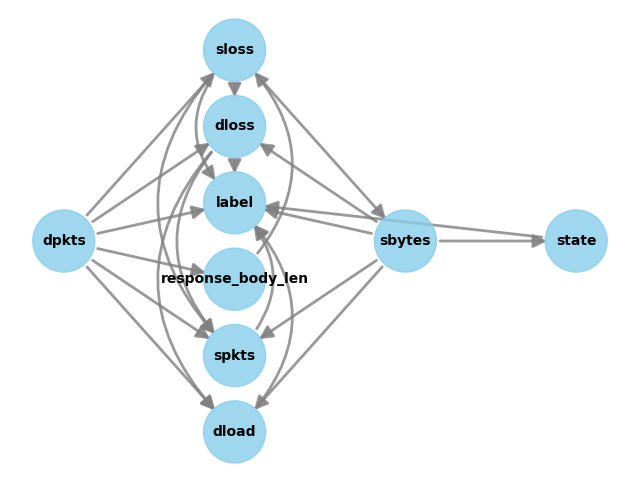

In [ ]:
# Now you can create your DoWhy model dynamically:
import dowhy

# For example, pick one treatment at a time or if multiple treatments, loop or choose one:
treatment_var = list(treatments)[0]  # or choose the treatment you want

model = dowhy.CausalModel(
    data=df,  # your dataset
    graph=causal_graph_str.replace("\n", " "),
    treatment=treatment_var,
    outcome="label"
)

model.view_model()

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...




Analyzing treatment: spkts -> outcome: label


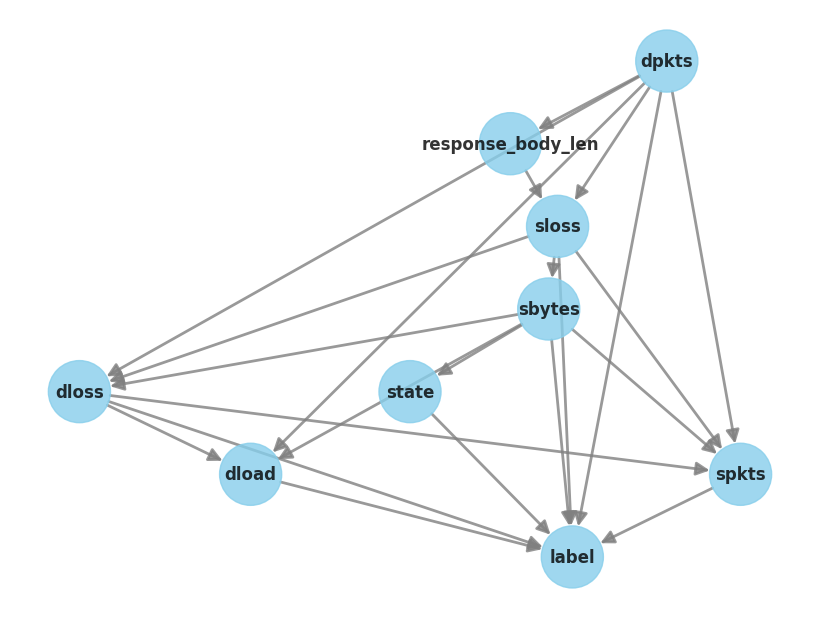

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                       
────────(E[label|sbytes,dloss,sloss,dpkts])
d[spkts]                                   
Estimand assumption 1, Unconfoundedness: If U→{spkts} and U→label then P(label|spkts,sbytes,dloss,sloss,dpkts,U) = P(label|spkts,sbytes,dloss,sloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                       
────────(E[label|sbytes,sloss,dpkts,dloss])
d[spkts]                                   
Estimand assumption 1, Unconfoundedness: If U→{spkts} and U→label then P(label|spkts,sbytes,sloss,dpkts,dloss,U) = P(label|spkts,sbytes,sloss,dpkts,dloss)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand 

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.15638304408415166
New effect:-0.1527663921694545
p value:0.92



Analyzing treatment: sbytes -> outcome: label


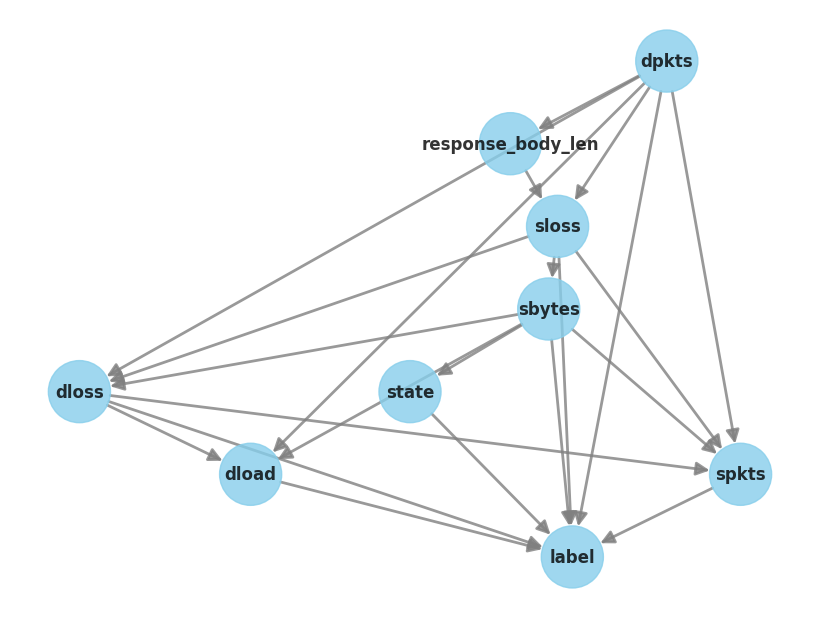

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                    
─────────(E[label|sloss])
d[sbytes]                
Estimand assumption 1, Unconfoundedness: If U→{sbytes} and U→label then P(label|sbytes,sloss,U) = P(label|sbytes,sloss)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
    d                    
─────────(E[label|sloss])
d[sbytes]                
Estimand assumption 1, Unconfoundedness: If U→{sbytes} and U→label then P(label|sbytes,sloss,U) = P(label|sbytes,sloss)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                    
─────────(E[label|sloss])
d[sbytes]                


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:0.9991193136043082
New effect:1.0016811021823278
p value:0.98



Analyzing treatment: dload -> outcome: label


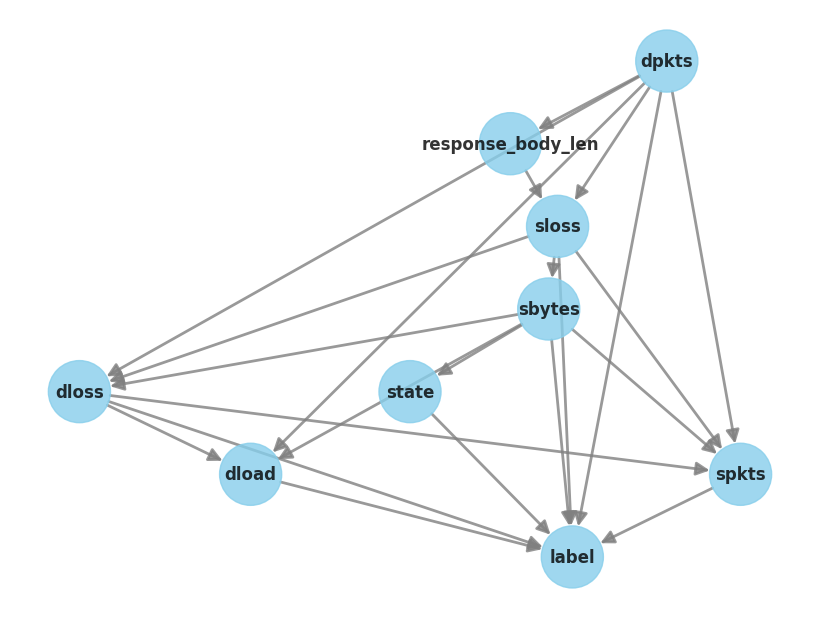

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                 
────────(E[label|sbytes,dloss,dpkts])
d[dload]                             
Estimand assumption 1, Unconfoundedness: If U→{dload} and U→label then P(label|dload,sbytes,dloss,dpkts,U) = P(label|dload,sbytes,dloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                 
────────(E[label|sbytes,dpkts,dloss])
d[dload]                             
Estimand assumption 1, Unconfoundedness: If U→{dload} and U→label then P(label|dload,sbytes,dpkts,dloss,U) = P(label|dload,sbytes,dpkts,dloss)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estim

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.08380597191335559
New effect:-0.0836176708611048
p value:0.86



Analyzing treatment: state -> outcome: label


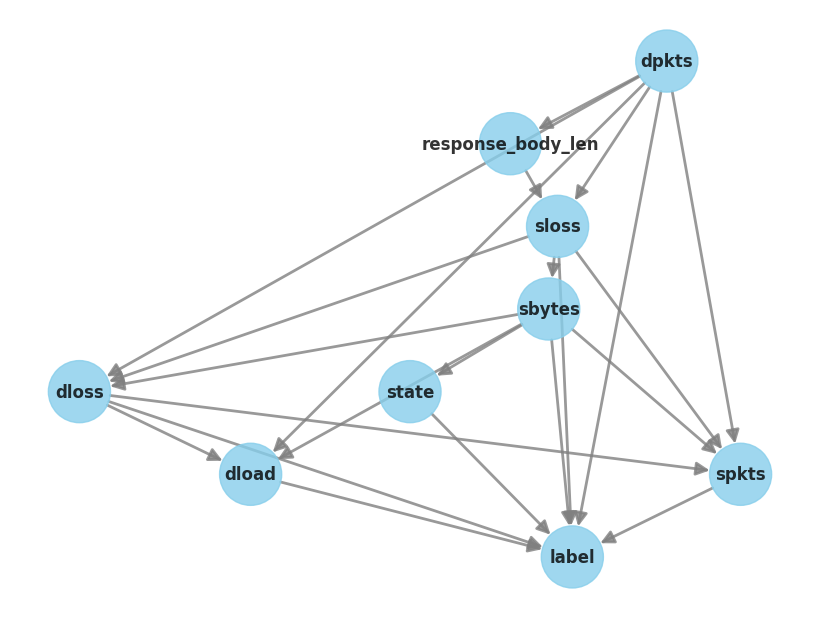

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                     
────────(E[label|sbytes])
d[state]                 
Estimand assumption 1, Unconfoundedness: If U→{state} and U→label then P(label|state,sbytes,U) = P(label|state,sbytes)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                     
────────(E[label|sbytes])
d[state]                 
Estimand assumption 1, Unconfoundedness: If U→{state} and U→label then P(label|state,sbytes,U) = P(label|state,sbytes)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                     
────────(E[label|sbytes])
d[state]                 
Es

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:1.5015709184199058
New effect:1.5009717831458804
p value:0.78



Analyzing treatment: response_body_len -> outcome: label


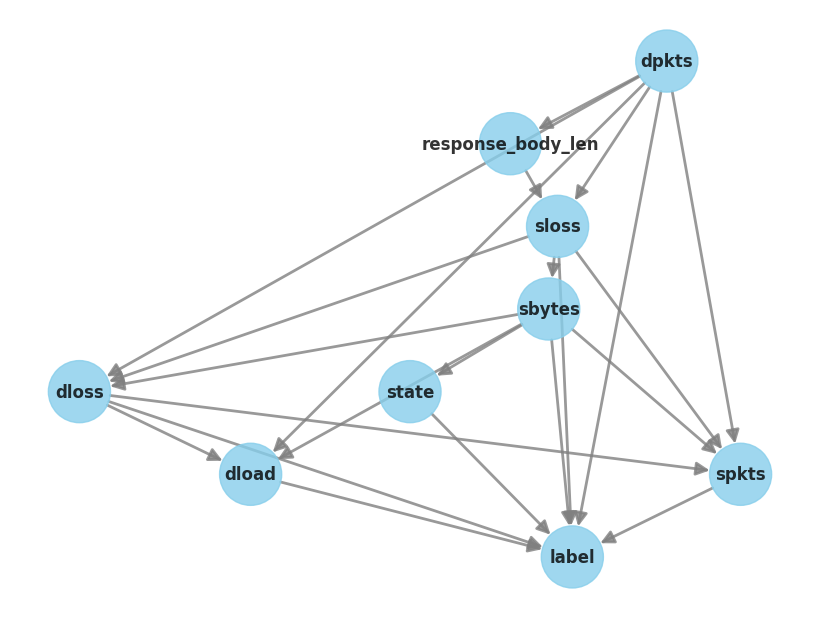

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                          
────────────────────(E[label|dpkts])
d[response_body_len]                
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→label then P(label|response_body_len,dpkts,U) = P(label|response_body_len,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
         d                          
────────────────────(E[label|dpkts])
d[response_body_len]                
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→label then P(label|response_body_len,dpkts,U) = P(label|response_body_len,dpkts)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Esti

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:0.01241337861321623
New effect:0.01260958201326876
p value:0.98



Analyzing treatment: dloss -> outcome: label


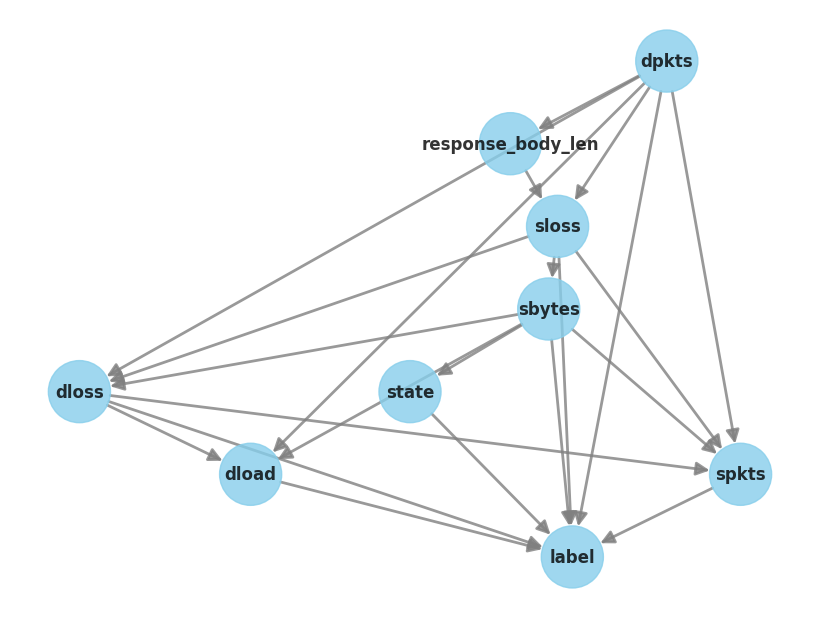

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                 
────────(E[label|sbytes,sloss,dpkts])
d[dloss]                             
Estimand assumption 1, Unconfoundedness: If U→{dloss} and U→label then P(label|dloss,sbytes,sloss,dpkts,U) = P(label|dloss,sbytes,sloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                 
────────(E[label|sbytes,sloss,dpkts])
d[dloss]                             
Estimand assumption 1, Unconfoundedness: If U→{dloss} and U→label then P(label|dloss,sbytes,sloss,dpkts,U) = P(label|dloss,sbytes,sloss,dpkts)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estim

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:1.5152821342462124
New effect:1.5053103718408223
p value:0.88



Analyzing treatment: sloss -> outcome: label


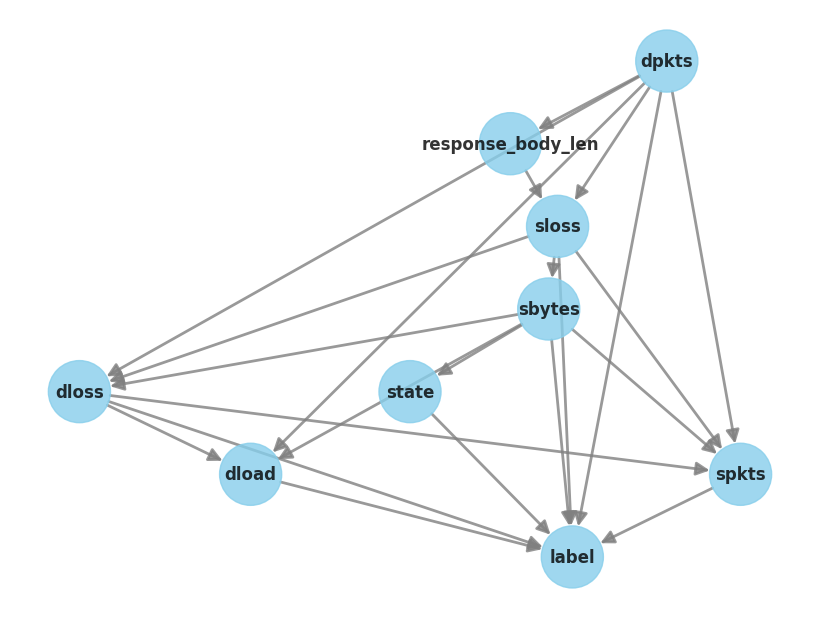

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                    
────────(E[label|dpkts])
d[sloss]                
Estimand assumption 1, Unconfoundedness: If U→{sloss} and U→label then P(label|sloss,dpkts,U) = P(label|sloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                    
────────(E[label|dpkts])
d[sloss]                
Estimand assumption 1, Unconfoundedness: If U→{sloss} and U→label then P(label|sloss,dpkts,U) = P(label|sloss,dpkts)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                    
────────(E[label|dpkts])
d[sloss]                
Estimand assump

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:0.010640340743675147
New effect:0.010670467785497401
p value:0.92



Analyzing treatment: dpkts -> outcome: label


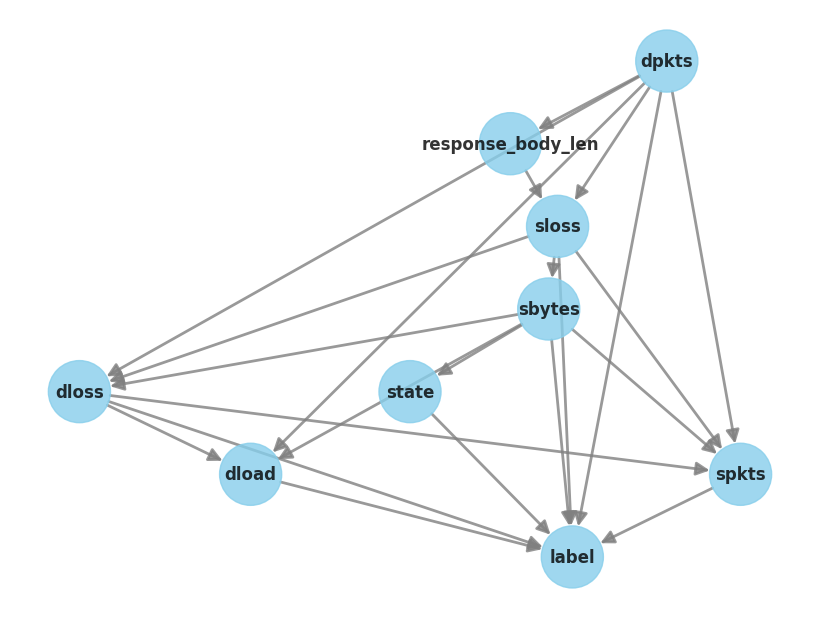

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d              
────────(E[label])
d[dpkts]          
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→label then P(label|dpkts,,U) = P(label|dpkts,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d              
────────(E[label])
d[dpkts]          
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→label then P(label|dpkts,,U) = P(label|dpkts,)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d              
────────(E[label])
d[dpkts]          
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→label then P(label|dpkts,,U) 

NameError: name 'output_file' is not defined

In [ ]:
from dowhy import CausalModel
import numpy as np

results = []
outcome = "label"  # your outcome variable

df = df.drop(labels=['attack_cat'], axis=1)

for treatment in treatments:
    print(f"\n\nAnalyzing treatment: {treatment} -> outcome: {outcome}")
    try:
        # Build the model for this treatment
        model = CausalModel(
            data=df,
            treatment=treatment,
            outcome=outcome,
            graph=causal_graph_str.replace("\n", " ")
        )

        # Optional: Visualize the causal graph (opens a viewer in Jupyter)
        model.view_model(layout="dot")

        # Step 2: Identify the causal effect
        identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
        print("Step 2: Identified Estimand")
        print(identified_estimand)

        # Step 3: Estimate the effect
        estimate = model.estimate_effect(
            identified_estimand,
            method_name="backdoor.linear_regression",
            target_units="ate"
        )
        print("\nStep 3: Causal Estimate")
        print(estimate)

        # Extract conditional estimates if available
        conditional_estimates = getattr(estimate, 'conditional_estimates', None)
        conditional_str = ""
        if conditional_estimates is not None:
            conditional_str = str(conditional_estimates).replace('\n', '; ')

        # Step 4: Refutations
        refute_random = model.refute_estimate(
            identified_estimand, estimate, method_name="random_common_cause"
        )
        print("\nStep 4: Refutation 1 - Random Common Cause")
        print(refute_random)

        refute_placebo = model.refute_estimate(
            identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute"
        )
        print("\nStep 4: Refutation 2 - Placebo Treatment")
        print(refute_placebo)

        refute_subset = model.refute_estimate(
            identified_estimand, estimate, method_name="data_subset_refuter", subset_fraction=0.8
        )
        print("\nStep 4: Refutation 3 - Data Subset")
        print(refute_subset)

        # Store results in dictionary
        result = {
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': estimate.value,
            'Conditional_Estimates': conditional_str,
            'Results_Estimate': str(estimate),
            'Random_Common_Cause_New_Effect': refute_random.new_effect,
            'Random_Common_Cause_p_value': refute_random.refutation_result.get('p_value', np.nan),
            'Placebo_Treatment_New_Effect': refute_placebo.new_effect,
            'Placebo_Treatment_p_value': refute_placebo.refutation_result.get('p_value', np.nan),
            'Data_Subset_New_Effect': refute_subset.new_effect,
            'Data_Subset_p_value': refute_subset.refutation_result.get('p_value', np.nan)
        }
        results.append(result)

    except Exception as e:
        print(f"Failed to analyze {treatment} ➝ {outcome}: {e}")
        results.append({
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': np.nan,
            'Conditional_Estimates': '',
            'Random_Common_Cause_New_Effect': np.nan,
            'Random_Common_Cause_p_value': np.nan,
            'Placebo_Treatment_New_Effect': np.nan,
            'Placebo_Treatment_p_value': np.nan,
            'Data_Subset_New_Effect': np.nan,
            'Data_Subset_p_value': np.nan
        })

results_df = pd.DataFrame(results)
results_df.to_csv(f'/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_label_{lower_limit}.csv', index=False)
print(f"\nResults saved to /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_label_{lower_limit}.csv")

#### model where evey treatment can be a confounder

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Treatment variable: sbytes
Confounders: ['response_body_len', 'sloss', 'dpkts']
Indirect causes: []


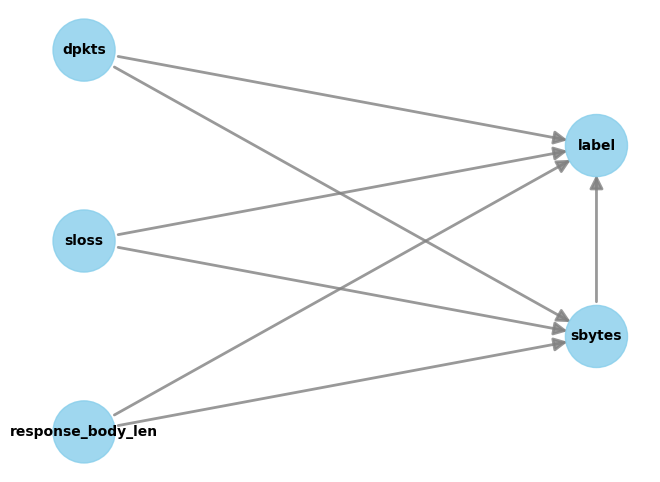

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                            
─────────(E[label|response_body_len,sloss,dpkts])
d[sbytes]                                        
Estimand assumption 1, Unconfoundedness: If U→{sbytes} and U→label then P(label|sbytes,response_body_len,sloss,dpkts,U) = P(label|sbytes,response_body_len,sloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
    d                                            
─────────(E[label|response_body_len,sloss,dpkts])
d[sbytes]                                        
Estimand assumption 1, Unconfoundedness: If U→{sbytes} and U→label then P(label|sbytes,response_body_len,sloss,dpkts,U) = P(label|sbytes,response_body_len,sloss,dpkts)


Step 3: Causal Esti

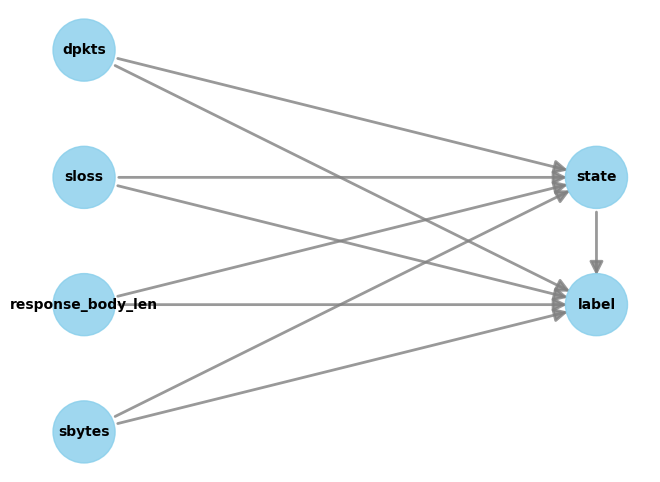

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                   
────────(E[label|sbytes,response_body_len,sloss,dpkts])
d[state]                                               
Estimand assumption 1, Unconfoundedness: If U→{state} and U→label then P(label|state,sbytes,response_body_len,sloss,dpkts,U) = P(label|state,sbytes,response_body_len,sloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                                   
────────(E[label|sbytes,response_body_len,sloss,dpkts])
d[state]                                               
Estimand assumption 1, Unconfoundedness: If U→{state} and U→label then P(label|state,sbytes,response_body_len,sloss,dpkts,U) = P(label|state,s

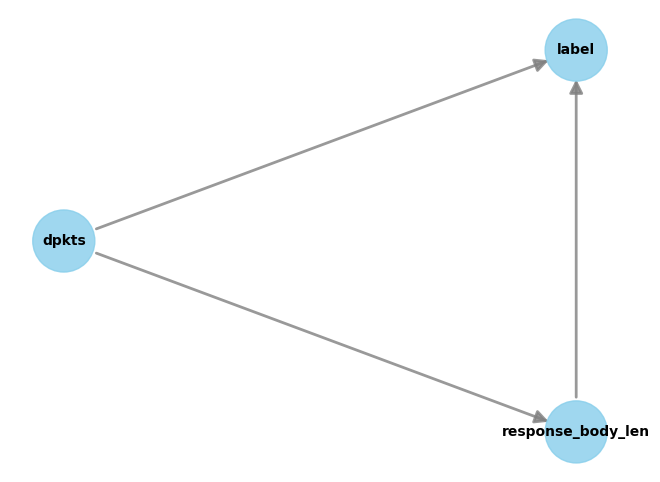

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                          
────────────────────(E[label|dpkts])
d[response_body_len]                
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→label then P(label|response_body_len,dpkts,U) = P(label|response_body_len,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
         d                          
────────────────────(E[label|dpkts])
d[response_body_len]                
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→label then P(label|response_body_len,dpkts,U) = P(label|response_body_len,dpkts)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Esti

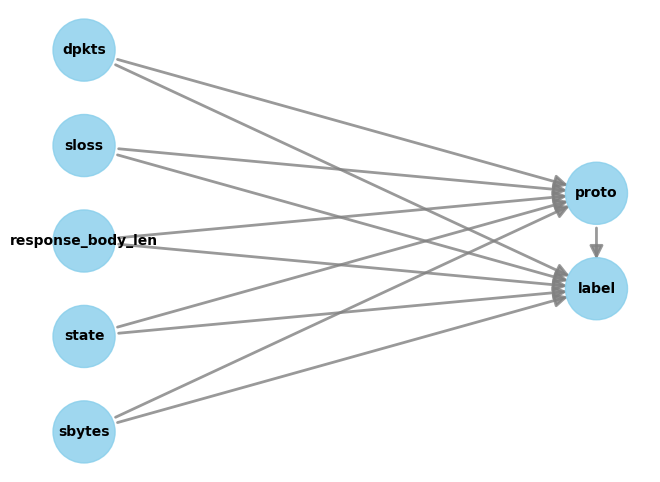

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                         
────────(E[label|sbytes,state,response_body_len,sloss,dpkts])
d[proto]                                                     
Estimand assumption 1, Unconfoundedness: If U→{proto} and U→label then P(label|proto,sbytes,state,response_body_len,sloss,dpkts,U) = P(label|proto,sbytes,state,response_body_len,sloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                                         
────────(E[label|sbytes,state,response_body_len,sloss,dpkts])
d[proto]                                                     
Estimand assumption 1, Unconfoundedness: If U→{proto} and U→label then P(label|proto,sbytes,st

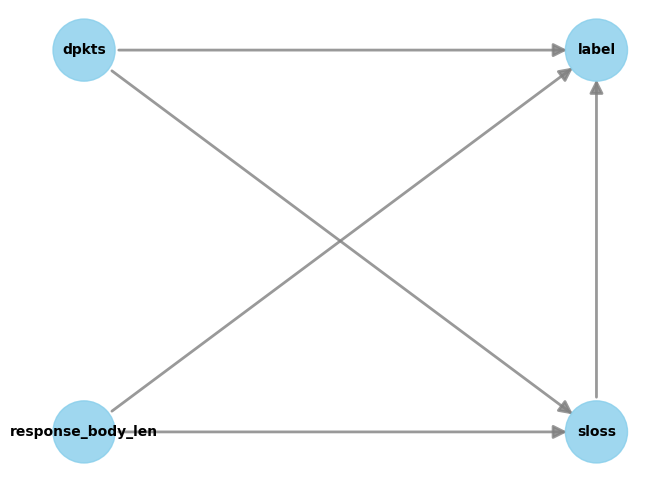

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                      
────────(E[label|response_body_len,dpkts])
d[sloss]                                  
Estimand assumption 1, Unconfoundedness: If U→{sloss} and U→label then P(label|sloss,response_body_len,dpkts,U) = P(label|sloss,response_body_len,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                      
────────(E[label|response_body_len,dpkts])
d[sloss]                                  
Estimand assumption 1, Unconfoundedness: If U→{sloss} and U→label then P(label|sloss,response_body_len,dpkts,U) = P(label|sloss,response_body_len,dpkts)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: Esti

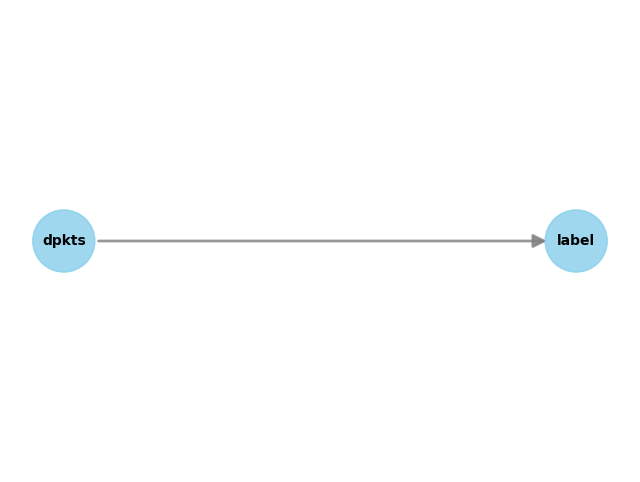

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d              
────────(E[label])
d[dpkts]          
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→label then P(label|dpkts,,U) = P(label|dpkts,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d              
────────(E[label])
d[dpkts]          
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→label then P(label|dpkts,,U) = P(label|dpkts,)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d              
────────(E[label])
d[dpkts]          
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→label then P(label|dpkts,,U) 

In [ ]:
import dowhy
from dowhy import CausalModel
import networkx as nx

def build_dowhy_models_from_paths(adj_matrix, feature_names, outcome_name, lower_limit=1e-6):
    # Step 1: Find all causal paths to the outcome
    causal_paths = find_all_causal_paths(adj_matrix, feature_names, outcome_name, lower_limit)

    # Possible treatments are the distinct starting nodes of these paths
    treatments = list(causal_paths.keys())

    if not treatments:
        raise ValueError(f"No treatments found for outcome '{outcome_name}'. Cannot build models.")

    models = []
    info_list = []

    # Step 2: For each treatment, build a causal graph and DoWhy model
    for treatment_var in treatments:
        # Build a NetworkX graph from adjacency matrix and prune edges below lower_limit
        G = nx.DiGraph()
        for i, col_i in enumerate(feature_names):
            G.add_node(col_i)
            for j, col_j in enumerate(feature_names):
                weight = adj_matrix[i, j]
                if abs(weight) > lower_limit:
                    G.add_edge(col_j, col_i, weight=weight)

        # Confounders = ancestors common to both treatment and outcome
        confounders = nx.ancestors(G, treatment_var).intersection(nx.ancestors(G, outcome_name))

        # Indirect causes = ancestors of treatment but not confounders or treatment itself
        indirect_causes = nx.ancestors(G, treatment_var) - confounders - {treatment_var}

        # Build edges for DOT graph
        edges = []
        for c in confounders:
            edges.append(f"{c} -> {treatment_var}")
            edges.append(f"{c} -> {outcome_name}")
        edges.append(f"{treatment_var} -> {outcome_name}")
        for ic in indirect_causes:
            edges.append(f"{ic} -> {treatment_var}")

        nodes = set([treatment_var, outcome_name]) | confounders | indirect_causes
        dot_graph = "digraph { " + "; ".join(edges) + " }"

        # Build DoWhy causal model restricting to relevant variables
        model = CausalModel(
            data=df[list(nodes)],
            graph=dot_graph.replace("\n", " "),
            treatment=treatment_var,
            outcome=outcome_name
        )

        models.append(model)
        info_list.append({
            "treatment": treatment_var,
            "confounders": list(confounders),
            "indirect_causes": list(indirect_causes),
            "graph": dot_graph
        })

    return models, info_list, treatments


# ==== Example usage ====
labels = list(df.columns)
adj_matrix = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

lower_limit = 0.1

models, info_list, treatments = build_dowhy_models_from_paths(
    adj_matrix, labels, "label", lower_limit
)
results = []
outcome = "label"  # your outcome variable

for info, model in zip(info_list, models):
    print(f"\nTreatment variable: {info['treatment']}")
    print("Confounders:", info['confounders'])
    print("Indirect causes:", info['indirect_causes'])
    model.view_model()
    try:
    # Step 2: Identify the causal effect
        identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
        print("Step 2: Identified Estimand")
        print(identified_estimand)

        # Step 3: Estimate the effect
        estimate = model.estimate_effect(
            identified_estimand,
            method_name="backdoor.linear_regression",
            target_units="ate"
        )
        print("\nStep 3: Causal Estimate")
        print(estimate)

        # Extract conditional estimates if available
        conditional_estimates = getattr(estimate, 'conditional_estimates', None)
        conditional_str = ""
        if conditional_estimates is not None:
            conditional_str = str(conditional_estimates).replace('\n', '; ')

        # Step 4: Refutations
        refute_random = model.refute_estimate(
            identified_estimand, estimate, method_name="random_common_cause"
        )
        print("\nStep 4: Refutation 1 - Random Common Cause")
        print(refute_random)

        refute_placebo = model.refute_estimate(
            identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute"
        )
        print("\nStep 4: Refutation 2 - Placebo Treatment")
        print(refute_placebo)

        refute_subset = model.refute_estimate(
            identified_estimand, estimate, method_name="data_subset_refuter", subset_fraction=0.8
        )
        print("\nStep 4: Refutation 3 - Data Subset")
        print(refute_subset)

        # Store results in dictionary
        result = {
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': estimate.value,
            'Conditional_Estimates': conditional_str,
            'Results_Estimate': str(estimate),
            'Random_Common_Cause_New_Effect': refute_random.new_effect,
            'Random_Common_Cause_p_value': refute_random.refutation_result.get('p_value', np.nan),
            'Placebo_Treatment_New_Effect': refute_placebo.new_effect,
            'Placebo_Treatment_p_value': refute_placebo.refutation_result.get('p_value', np.nan),
            'Data_Subset_New_Effect': refute_subset.new_effect,
            'Data_Subset_p_value': refute_subset.refutation_result.get('p_value', np.nan)
        }
        results.append(result)

    except Exception as e:
        print(f"Failed to analyze {treatment} ➝ {outcome}: {e}")
        results.append({
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': np.nan,
            'Conditional_Estimates': '',
            'Random_Common_Cause_New_Effect': np.nan,
            'Random_Common_Cause_p_value': np.nan,
            'Placebo_Treatment_New_Effect': np.nan,
            'Placebo_Treatment_p_value': np.nan,
            'Data_Subset_New_Effect': np.nan,
            'Data_Subset_p_value': np.nan
        })

results_df = pd.DataFrame(results)
results_df.to_csv(f'/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_label_2_{lower_limit}.csv', index=False)
print(f"\nResults saved to /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_label_2_{lower_limit}.csv")




=== Creating Comprehensive Causal Visualization ===


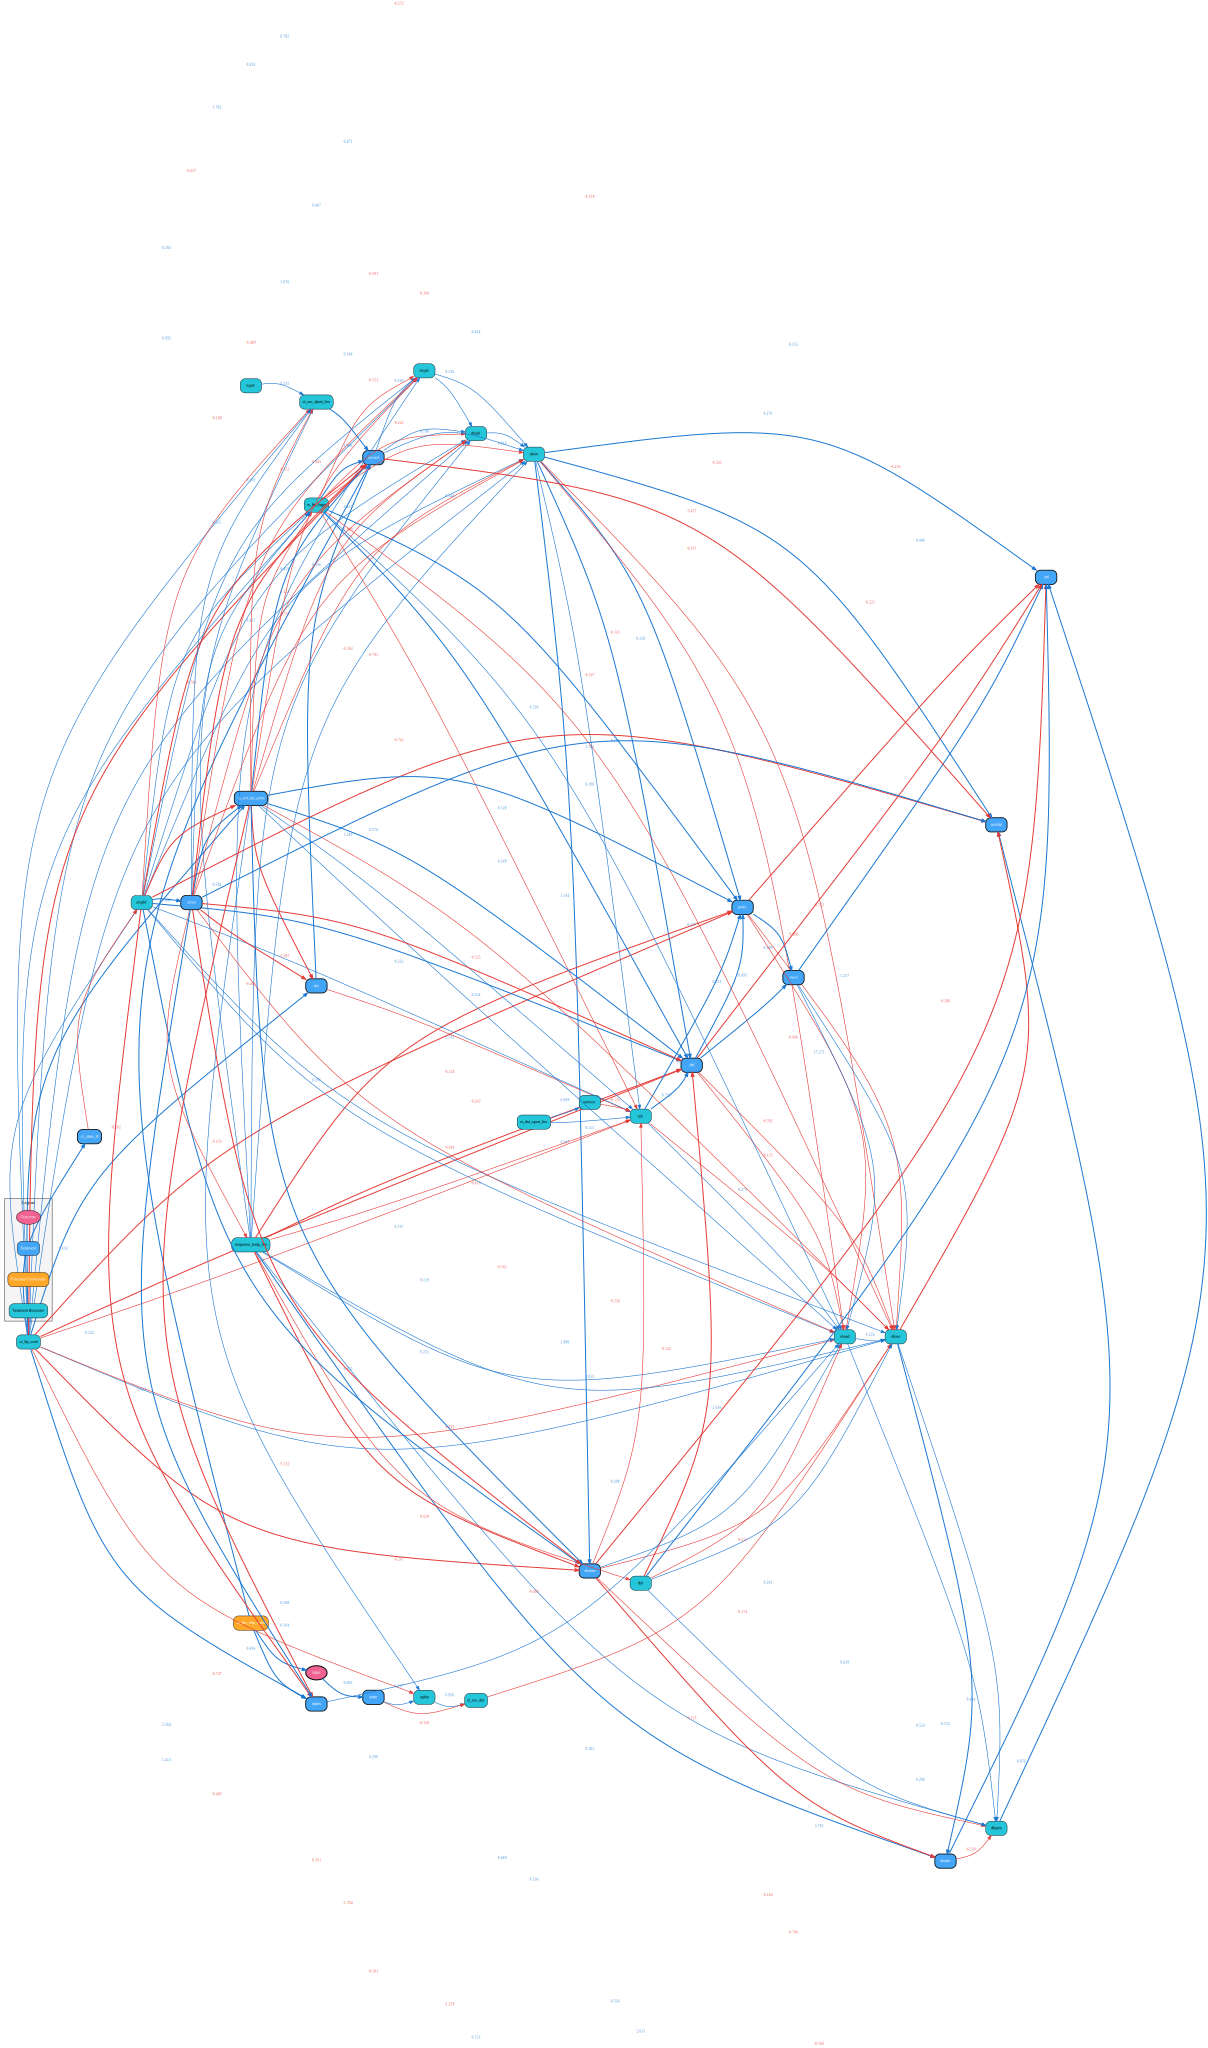


=== Analysis Summary ===
Total nodes in causal structure: 34
Total edges: 151
Outcome ancestors: 1
Treatment ancestors: 32
Potential confounders: 1

Potential confounders (affect both treatments and outcome):
  - ct_flw_http_mthd

Direct causes of each treatment:
  dur: ['ct_ftp_cmd', 'sloss', 'is_sm_ips_ports']
  proto: ['response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'sjit', 'is_sm_ips_ports', 'dwin', 'dttl']
  state: ['label']
  dpkts: ['ct_ftp_cmd', 'sloss', 'sinpkt', 'is_sm_ips_ports', 'ct_flw_http_mthd']
  sttl: ['djit', 'dmean', 'dwin', 'swin', 'proto', 'dttl', 'dbytes']
  dttl: ['djit', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'sloss', 'sjit', 'sinpkt', 'is_sm_ips_ports', 'dwin']
  sloss: ['sinpkt']
  dinpkt: ['response_body_len', 'dloss', 'dmean']
  swin: ['proto', 'dttl']
  synack: ['is_ftp_login', 'ct_ftp_cmd', 'sloss', 'dur', 'sinpkt', 'is_sm_ips_ports', 'ct_flw_http_mthd', 'ct_src_dport_ltm']
  ackdat: ['sloss', 'dloss', 'dinpkt', 'sinpkt', 'dwin', 'synack']


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import graphviz
from collections import deque
from IPython.display import display

# User-provided lists for visualization
# Note: These lists are used to inform the categorization logic in the visualization.
TREATMENT_VARS = ['dur', 'proto', 'state', 'dpkts', 'sttl', 'dttl', 'sloss', 'dinpkt', 'swin', 'synack', 'ackdat', 'dmean', 'ct_state_ttl', 'is_sm_ips_ports']
INDIRECT_CAUSES = ['dwin', 'ct_flw_http_mthd', 'ct_ftp_cmd', 'dloss', 'dload', 'trans_depth', 'response_body_len', 'rate', 'is_ftp_login', 'smean', 'sjit', 'spkts', 'sbytes', 'sinpkt', 'sload', 'stcpb', 'tcprtt', 'dtcpb', 'djit']
CONFOUNDERS = ['dload', 'trans_depth', 'response_body_len', 'rate', 'dwin', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'smean', 'sjit', 'spkts', 'sbytes', 'sinpkt', 'sload', 'stcpb', 'dtcpb', 'tcprtt', 'dloss', 'djit']
OUTCOME_NAME = 'label'

def _build_graph(adjacency_matrix, feature_names, lower_limit):
    """Helper function to build a NetworkX directed graph from the adjacency matrix."""
    G = nx.DiGraph()
    for i, col_i in enumerate(feature_names):
        G.add_node(col_i)
        for j, col_j in enumerate(feature_names):
            weight = adjacency_matrix[i, j]
            # Add an edge only if the weight is above the specified lower limit
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight)  # j -> i
    return G

def _find_ancestors(graph, node_name, max_depth=None):
    """Find all ancestors of a node up to a specified depth using BFS."""
    ancestors = set()
    if node_name not in graph:
        return ancestors

    if max_depth is None:
        return nx.ancestors(graph, node_name)

    queue = deque([(node_name, 0)])
    visited = {node_name}

    while queue:
        current_node, depth = queue.popleft()
        if depth >= max_depth:
            continue

        for parent in graph.predecessors(current_node):
            if parent not in visited:
                ancestors.add(parent)
                visited.add(parent)
                queue.append((parent, depth + 1))
    return ancestors

def create_categorized_causal_graph(adjacency_matrix, feature_names, outcome_name,
                                    treatment_vars=None, lower_limit=0.1, max_depth=None):
    """
    Creates and visualizes a causal graph focusing on the paths to a specified outcome
    and optional treatment variables, with dynamic categorization.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        feature_names (list): A list of column names corresponding to the matrix.
        outcome_name (str): The name of the outcome variable to focus on.
        treatment_vars (list, optional): List of treatment variable names.
        lower_limit (float, optional): Edges with an absolute weight below this limit are pruned.
        max_depth (int, optional): Maximum depth to search for ancestors. None for unlimited.

    Returns:
        graphviz.Digraph: A Graphviz object representing the filtered graph.
        dict: A dictionary with analysis results (e.g., confounders, ancestors).
    """
    # Step 1: Build the full NetworkX graph
    G = _build_graph(adjacency_matrix, feature_names, lower_limit)

    # Step 2: Find ancestors for outcome and treatments
    outcome_ancestors = _find_ancestors(G, outcome_name, max_depth)
    treatment_ancestors = set()
    treatment_direct_causes = {}

    if treatment_vars:
        for treatment in treatment_vars:
            if treatment in G:
                treatment_ancestors.update(_find_ancestors(G, treatment, max_depth))
                treatment_direct_causes[treatment] = list(G.predecessors(treatment))

    # Step 3: Categorize all relevant nodes
    all_relevant_nodes = outcome_ancestors.union(treatment_ancestors).union({outcome_name})
    if treatment_vars:
        all_relevant_nodes.update(treatment_vars)

    node_categories = {}
    confounders = outcome_ancestors.intersection(treatment_ancestors)

    for node in all_relevant_nodes:
        if node == outcome_name:
            node_categories[node] = 'outcome'
        elif treatment_vars and node in treatment_vars:
            node_categories[node] = 'treatment'
        elif node in confounders:
            node_categories[node] = 'confounder'
        elif node in outcome_ancestors:
            node_categories[node] = 'outcome_ancestor'
        elif node in treatment_ancestors:
            node_categories[node] = 'treatment_ancestor'
        else:
            node_categories[node] = 'other'

    # Step 4: Create subgraph for visualization
    subgraph = G.subgraph(all_relevant_nodes)
    if not subgraph.nodes():
        print("No relevant nodes found for visualization.")
        return None, {}

    # Step 5: Define styling dictionaries
    node_styles = {
        'outcome': {'fillcolor': '#F06292', 'fontcolor': 'white', 'shape': 'ellipse', 'penwidth': '2.5'},
        'treatment': {'fillcolor': '#42A5F5', 'fontcolor': 'white', 'penwidth': '2.0'},
        'confounder': {'fillcolor': '#FFA726', 'fontcolor': 'white'},
        'outcome_ancestor': {'fillcolor': '#66BB6A', 'fontcolor': 'white'},
        'treatment_ancestor': {'fillcolor': '#26C6DA', 'fontcolor': 'black'},
        'other': {'fillcolor': '#E0E0E0', 'fontcolor': 'black'},
    }
    legend_styles = {
        'outcome': ('Outcome', '#F06292', 'white', 'ellipse'),
        'treatment': ('Treatment', '#42A5F5', 'white', 'box'),
        'confounder': ('Potential Confounder', '#FFA726', 'white', 'box'),
        'outcome_ancestor': ('Indirect Cause', '#66BB6A', 'white', 'box'),
        'treatment_ancestor': ('Treatment Ancestor', '#26C6DA', 'black', 'box'),
    }

    # Step 6: Create the Graphviz visualization
    dot = graphviz.Digraph(comment=f'Causal Structure for {outcome_name}', engine='dot')
    dot.attr('graph', rankdir='LR', splines='curved', overlap='false', nodesep='0.6', ranksep='0.75')
    dot.attr('node', shape='box', style='rounded,filled', fontname='Helvetica', fontsize='10', margin='0.08,0.05')
    dot.attr('edge', fontsize='8', arrowhead='normal', penwidth='1.5')

    for node, category in node_categories.items():
        style = node_styles.get(category, node_styles['other'])
        dot.node(node, node, **style)

    for u, v, data in subgraph.edges(data=True):
        weight = data['weight']
        edge_color = '#E53935' if weight < 0 else '#1976D2'
        label = f"{weight:.3f}"

        penwidth = '2.5' if v in [outcome_name] + (treatment_vars or []) else '1.5'

        dot.edge(u, v, label=label, color=edge_color, fontcolor=edge_color, penwidth=penwidth)

    # Step 7: Add a dynamic legend
    with dot.subgraph(name='cluster_legend') as legend:
        legend.attr(label='Legend', fontsize='12', style='filled', fillcolor='#F5F5F5')
        for key, (label, fillcolor, fontcolor, shape) in legend_styles.items():
            if key in node_categories.values() or key == 'treatment_ancestor' and len(causal_ancestors_extended) > 0:
                legend.node(f'leg_{key}', label, fillcolor=fillcolor, fontcolor=fontcolor, shape=shape)

    # Step 8: Prepare analysis results
    analysis_results = {
        'outcome_ancestors': list(outcome_ancestors),
        'treatment_ancestors': list(treatment_ancestors),
        'potential_confounders': list(confounders),
        'treatment_direct_causes': treatment_direct_causes,
        'total_nodes': len(subgraph.nodes()),
        'total_edges': len(subgraph.edges())
    }

    return dot, analysis_results

# ==== Usage with user-provided lists ====
# Load the adjacency matrix and feature names
adj_matrix = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

feature_names = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login',
                'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt',
                'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label',
                'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin',
                'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl',
                'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat',
                'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm',
                'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']


print("=== Creating Comprehensive Causal Visualization ===")
causal_ancestors_extended, analysis = create_categorized_causal_graph(
    adj_matrix, feature_names, OUTCOME_NAME,
    treatment_vars=TREATMENT_VARS,
    lower_limit=0.1,
    max_depth=None
)

if causal_ancestors_extended:
    display(causal_ancestors_extended)

    print(f"\n=== Analysis Summary ===")
    print(f"Total nodes in causal structure: {analysis['total_nodes']}")
    print(f"Total edges: {analysis['total_edges']}")
    print(f"Outcome ancestors: {len(analysis['outcome_ancestors'])}")
    print(f"Treatment ancestors: {len(analysis['treatment_ancestors'])}")
    print(f"Potential confounders: {len(analysis['potential_confounders'])}")

    print(f"\nPotential confounders (affect both treatments and outcome):")
    for conf in analysis['potential_confounders']:
        print(f"  - {conf}")

    print(f"\nDirect causes of each treatment:")
    for treatment, causes in analysis['treatment_direct_causes'].items():
        print(f"  {treatment}: {causes}")

print(f"\n=== Variables for Causal Inference ===")
print(f"Treatment variables: {TREATMENT_VARS}")
print(f"Outcome: {OUTCOME_NAME}")
print(f"Potential confounders: {analysis['potential_confounders'] if 'analysis' in locals() and analysis else 'Run visualization first'}")


## oonly attack_cat

In [3]:
import pandas as pd
import numpy as np
import dowhy
from dowhy import CausalModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings

# Suppress some common warnings for cleaner output
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/data/UNSW_NB15_freq_scaled.csv')
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,-0.188346,0.477508,0.548451,0.4547,-0.101342,-0.129612,-0.047849,-0.097232,-0.568650,0.702512,...,-0.520051,-0.658496,-0.110419,-0.110372,-0.193597,-0.690790,-0.746782,-0.120335,0.360923,0
1,-0.099897,0.477508,0.548451,0.4547,-0.042496,0.173998,-0.045110,0.188966,-0.568623,-1.151363,...,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.287000,-0.120335,0.360923,0
2,0.063006,0.477508,0.548451,0.4547,-0.086630,-0.022456,-0.047239,-0.008217,-0.569024,-1.151363,...,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.287000,-0.120335,0.360923,0
3,0.072800,0.477508,0.019327,0.4547,-0.057207,-0.058174,-0.045720,-0.093142,-0.569027,-1.151363,...,-0.520051,-0.478652,8.503550,8.479151,-0.193597,-0.571689,-0.746782,-0.120335,0.360923,0
4,-0.133449,0.477508,0.548451,0.4547,-0.071919,-0.111753,-0.046261,-0.096576,-0.568904,0.722026,...,-0.520051,2.848467,-0.110419,-0.110372,-0.193597,-0.571689,2.747558,-0.120335,0.360923,0


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
from collections import defaultdict
from IPython.display import display

def find_all_causal_paths(adjacency_matrix, feature_names, outcome_name, lower_limit=1e-6):
    """
    Finds all possible simple causal paths leading to a specified outcome node.

    A path is a sequence of nodes where each node is a direct cause of the next.
    A simple path does not repeat any nodes.

    Args:
        adjacency_matrix (np.ndarray): The adjacency matrix from a LiNGAM model.
        feature_names (list): A list of column names corresponding to the matrix.
        outcome_name (str): The name of the outcome variable to find paths to.
        lower_limit (float, optional): Edges with an absolute weight below this limit
                                       are pruned. Defaults to 1e-6.

    Returns:
        dict: A dictionary where keys are the starting nodes of the paths and
              values are lists of all simple paths found from that node to the outcome.
    """
    # Step 1: Build a NetworkX directed graph from the adjacency matrix
    G = nx.DiGraph()
    for i, col_i in enumerate(feature_names):
        G.add_node(col_i)
        for j, col_j in enumerate(feature_names):
            weight = adjacency_matrix[i, j]
            if abs(weight) > lower_limit:
                G.add_edge(col_j, col_i, weight=weight) # j -> i

    # Check if the outcome node exists in the graph
    if outcome_name not in G:
        print(f"Error: Outcome variable '{outcome_name}' not found in the graph.")
        return {}

    # Step 2: Find all nodes that are ancestors of the outcome.
    # Paths can only originate from these nodes.
    outcome_ancestors = nx.ancestors(G, outcome_name)

    # Step 3: Find all simple paths from each ancestor to the outcome.
    all_paths = defaultdict(list)
    for start_node in outcome_ancestors:
        # nx.all_simple_paths is the most efficient way to find all paths
        paths_from_node = list(nx.all_simple_paths(G, source=start_node, target=outcome_name))
        if paths_from_node:
            all_paths[start_node] = paths_from_node

    return dict(all_paths)


# ==== Example usage with your data ====
# Load the adjacency matrix and feature names
adj_matrix = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

# Assume 'df' is available and the feature names are its columns.
# If not, you must provide the list of feature names manually.
# feature_names = ['dpkts', 'djit', 'trans_depth', 'response_body_len', 'is_ftp_login',
#                 'ct_ftp_cmd', 'sloss', 'sbytes', 'dloss', 'dload', 'sjit', 'dinpkt',
#                 'dur', 'sinpkt', 'is_sm_ips_ports', 'spkts', 'state', 'label',
#                 'ct_flw_http_mthd', 'dmean', 'stcpb', 'dtcpb', 'dwin', 'swin',
#                 'proto', 'dttl', 'ackdat', 'synack', 'tcprtt', 'ct_state_ttl',
#                 'rate', 'sload', 'smean', 'sttl', 'dbytes', 'attack_cat',
#                 'ct_dst_sport_ltm', 'service', 'ct_src_dport_ltm', 'ct_dst_ltm',
#                 'ct_dst_src_ltm', 'ct_srv_dst', 'ct_srv_src', 'ct_src_ltm']

feature_names = df.columns.tolist()

lower_limit = 0.1
# Find all causal paths to the 'label' node
causal_paths_to_label = find_all_causal_paths(
    adj_matrix,
    feature_names,
    "attack_cat",
    lower_limit=lower_limit
)

# Print the results in a readable format
if causal_paths_to_label:
    print("Found all causal paths to 'attack_cat':")
    for start_node, paths in causal_paths_to_label.items():
        print(f"\n--- Paths originating from '{start_node}': ---")
        for path in paths:
            print(" -> ".join(path))
else:
    print("No causal paths found for the given outcome and lower limit.")

Found all causal paths to 'attack_cat':

--- Paths originating from 'sbytes': ---
sbytes -> state -> proto -> attack_cat
sbytes -> state -> attack_cat

--- Paths originating from 'state': ---
state -> proto -> attack_cat
state -> attack_cat

--- Paths originating from 'response_body_len': ---
response_body_len -> sloss -> sbytes -> state -> proto -> attack_cat
response_body_len -> sloss -> sbytes -> state -> attack_cat

--- Paths originating from 'proto': ---
proto -> attack_cat

--- Paths originating from 'sloss': ---
sloss -> sbytes -> state -> proto -> attack_cat
sloss -> sbytes -> state -> attack_cat

--- Paths originating from 'dpkts': ---
dpkts -> sloss -> sbytes -> state -> proto -> attack_cat
dpkts -> sloss -> sbytes -> state -> attack_cat
dpkts -> response_body_len -> sloss -> sbytes -> state -> proto -> attack_cat
dpkts -> response_body_len -> sloss -> sbytes -> state -> attack_cat


In [ ]:
def build_dowhy_graph_string(all_paths, outcome_name):
    """
    Builds a DoWhy causal graph (DOT format) string from all causal paths to outcome_name.

    all_paths: dict from start_node -> list of paths (each path is list of nodes)
    outcome_name: the outcome variable name (e.g., "label")

    Returns:
        - graph_str: string of the DOT causal graph
        - treatments: set of treatment variables (start nodes)
    """
    edges = set()
    nodes = set()

    for start_node, paths in all_paths.items():
        nodes.add(start_node)
        for path in paths:
            nodes.update(path)
            # Add edges for the path (node_i -> node_i+1)
            for i in range(len(path) - 1):
                edges.add((path[i], path[i+1]))

    treatments = set(all_paths.keys())  # start nodes of paths are treatments

    # Build DOT graph string
    graph_lines = ["digraph {"]

    for u, v in edges:
        graph_lines.append(f'    "{u}" -> "{v}";')

    graph_lines.append("}")

    graph_str = "\n".join(graph_lines)
    return graph_str, treatments

# ==== Example usage ====
causal_graph_str, treatments = build_dowhy_graph_string(causal_paths_to_label, "attack_cat")
print("Treatments found:", treatments)
print("Causal graph string:\n", causal_graph_str)

Treatments found: {'sbytes', 'state', 'response_body_len', 'proto', 'sloss', 'dpkts'}
Causal graph string:
 digraph {
    "proto" -> "attack_cat";
    "state" -> "proto";
    "dpkts" -> "response_body_len";
    "response_body_len" -> "sloss";
    "sbytes" -> "state";
    "state" -> "attack_cat";
    "sloss" -> "sbytes";
    "dpkts" -> "sloss";
}


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...




Analyzing treatment: sbytes -> outcome: attack_cat


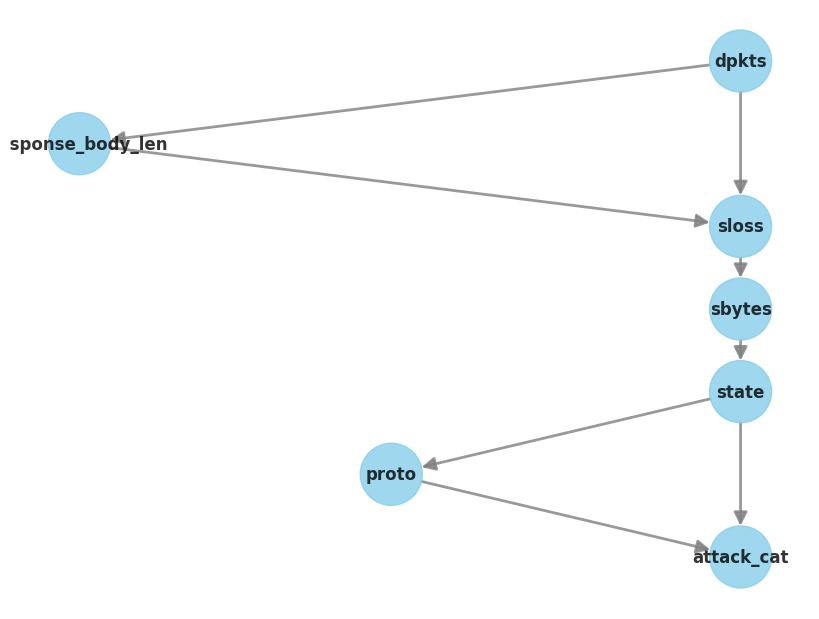

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                   
─────────(E[attack_cat])
d[sbytes]               
Estimand assumption 1, Unconfoundedness: If U→{sbytes} and U→attack_cat then P(attack_cat|sbytes,,U) = P(attack_cat|sbytes,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                         -1⎤
 ⎢   d                 ⎛   d              ⎞  ⎥
E⎢────────(attack_cat)⋅⎜────────([sbytes])⎟  ⎥
 ⎣d[sloss]             ⎝d[sloss]          ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→attack_cat then ¬(U →→{sloss})
Estimand assumption 2, Exclusion: If we remove {sloss}→{sbytes}, then ¬({sloss}→attack_cat)

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡       d                        ∂                    ⎤
E⎢───────────────(attack_cat)⋅─────────([state  proto])⎥
 ⎣d[state  proto]             ∂[sbytes]                ⎦
Estimand assumpti

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.002185066965724236
New effect:-0.0021939496899193427
p value:0.9



Analyzing treatment: state -> outcome: attack_cat


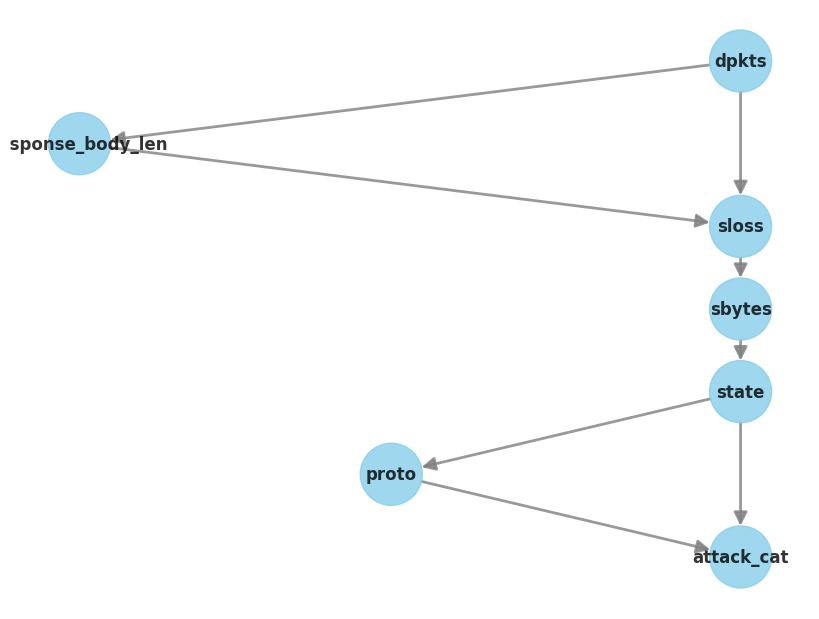

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
────────(E[attack_cat])
d[state]               
Estimand assumption 1, Unconfoundedness: If U→{state} and U→attack_cat then P(attack_cat|state,,U) = P(attack_cat|state,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                          -1⎤
 ⎢    d                 ⎛    d             ⎞  ⎥
E⎢─────────(attack_cat)⋅⎜─────────([state])⎟  ⎥
 ⎣d[sbytes]             ⎝d[sbytes]         ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→attack_cat then ¬(U →→{sbytes})
Estimand assumption 2, Exclusion: If we remove {sbytes}→{state}, then ¬({sbytes}→attack_cat)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                   
────────(E[attack_cat])
d[state]               
Estimand assumption 1, Unconfoundedne

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.2954316869723128
New effect:-0.29547260244383233
p value:0.96



Analyzing treatment: response_body_len -> outcome: attack_cat


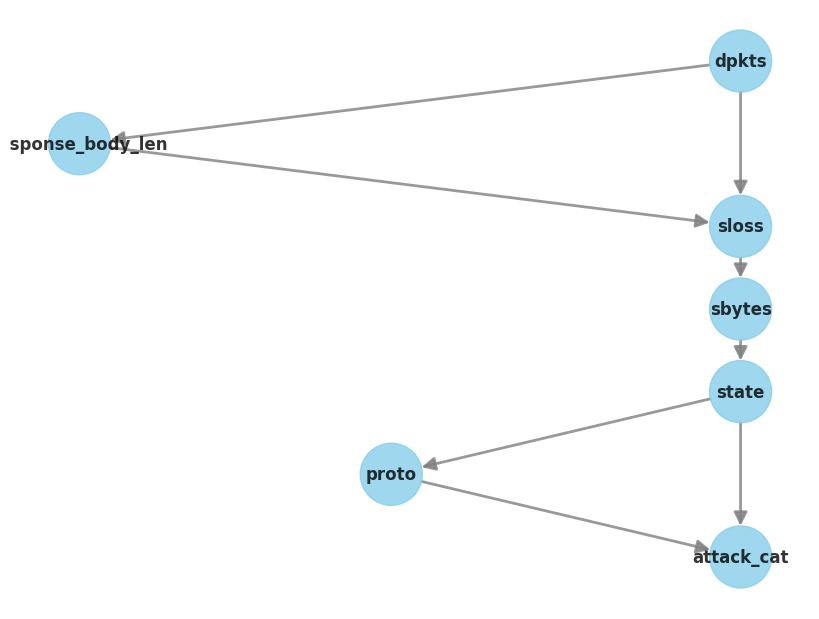

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                               
────────────────────(E[attack_cat|dpkts])
d[response_body_len]                     
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→attack_cat then P(attack_cat|response_body_len,dpkts,U) = P(attack_cat|response_body_len,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
         d                               
────────────────────(E[attack_cat|dpkts])
d[response_body_len]                     
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→attack_cat then P(attack_cat|response_body_len,dpkts,U) = P(attack_cat|response_body_len,dpkts)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified esti

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.0023327666998369523
New effect:-0.0024215271443584203
p value:0.78



Analyzing treatment: proto -> outcome: attack_cat


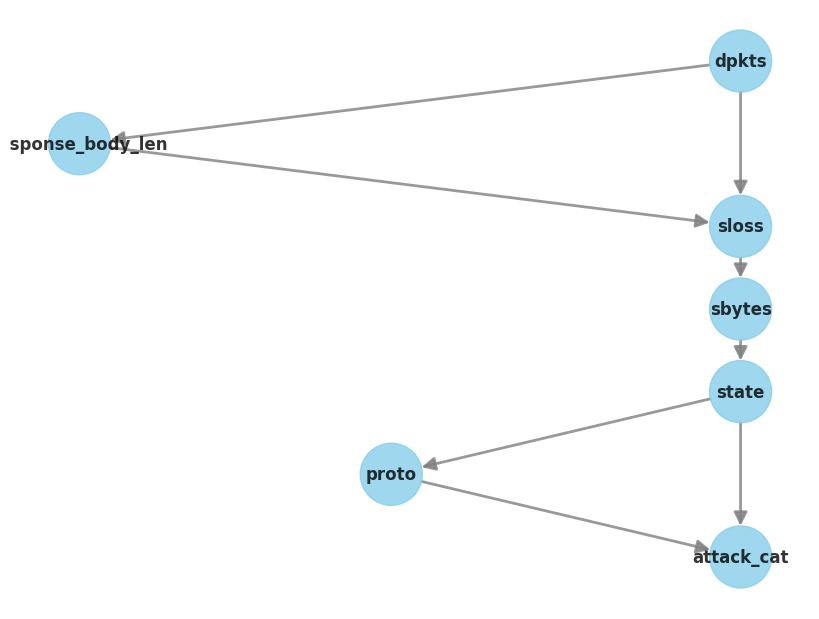

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                         
────────(E[attack_cat|state])
d[proto]                     
Estimand assumption 1, Unconfoundedness: If U→{proto} and U→attack_cat then P(attack_cat|proto,state,U) = P(attack_cat|proto,state)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                         
────────(E[attack_cat|state])
d[proto]                     
Estimand assumption 1, Unconfoundedness: If U→{proto} and U→attack_cat then P(attack_cat|proto,state,U) = P(attack_cat|proto,state)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                         


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:0.2671314722674316
New effect:0.26710823851080706
p value:0.98



Analyzing treatment: sloss -> outcome: attack_cat


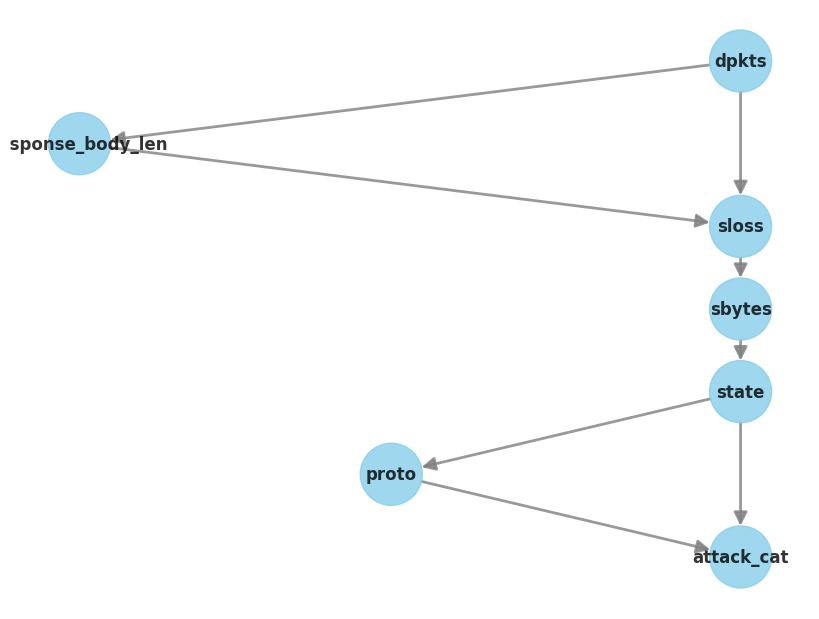

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
────────(E[attack_cat])
d[sloss]               
Estimand assumption 1, Unconfoundedness: If U→{sloss} and U→attack_cat then P(attack_cat|sloss,,U) = P(attack_cat|sloss,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                                             ↪
 ⎢             d                          ⎛             d                      ↪
E⎢───────────────────────────(attack_cat)⋅⎜───────────────────────────([sloss] ↪
 ⎣d[response_body_len  dpkts]             ⎝d[response_body_len  dpkts]         ↪

↪   -1⎤
↪  ⎞  ⎥
↪ )⎟  ⎥
↪  ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→attack_cat then ¬(U →→{response_body_len,dpkts})
Estimand assumption 2, Exclusion: If we remove {response_body_len,dpkts}→{sloss}, then ¬({response_body_len,dpkts}→attack_cat)

### Estimand : 3
Estimand name: fro

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Step 4: Refutation 3 - Data Subset
Refute: Use a subset of data
Estimated effect:-0.0006147642832330935
New effect:-0.0006083205202845618
p value:0.94



Analyzing treatment: dpkts -> outcome: attack_cat


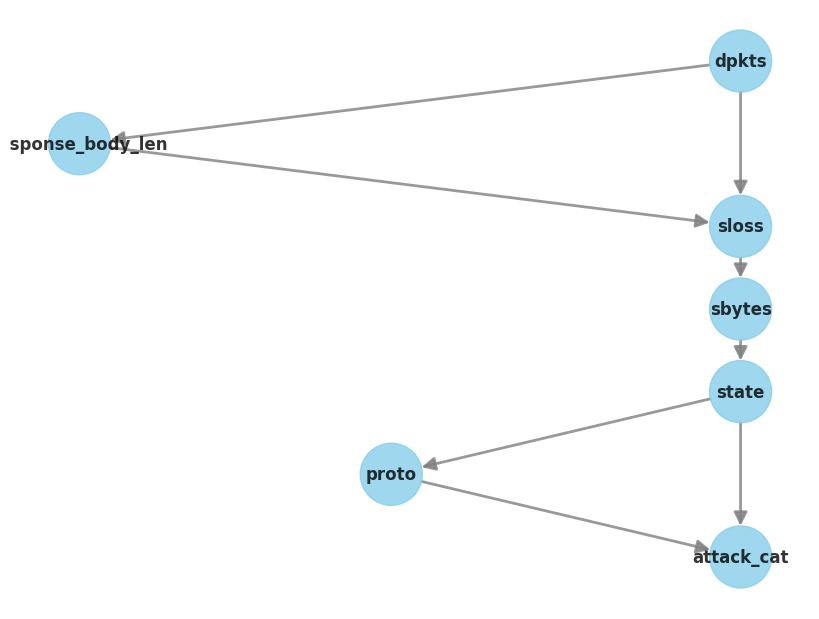

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
────────(E[attack_cat])
d[dpkts]               
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→attack_cat then P(attack_cat|dpkts,,U) = P(attack_cat|dpkts,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
Estimand expression:
 ⎡                        d                                        ∂           ↪
E⎢─────────────────────────────────────────────────(attack_cat)⋅────────([sbyt ↪
 ⎣d[sbytes  state  response_body_len  proto  sloss]             ∂[dpkts]       ↪

↪                                             ⎤
↪ es  state  response_body_len  proto  sloss])⎥
↪                                             ⎦
Estimand assumption 1, Full-mediation: sbytes,state,response_body_len,proto,sloss intercepts (blocks) all directed paths from dpkts to a,t,t,a,c,k,_,c,a,t

In [ ]:
from dowhy import CausalModel
import numpy as np

results = []
outcome = "attack_cat"  # your outcome variable

df = df.drop(labels=['label'], axis=1)

for treatment in treatments:
    print(f"\n\nAnalyzing treatment: {treatment} -> outcome: {outcome}")
    try:
        # Build the model for this treatment
        model = CausalModel(
            data=df,
            treatment=treatment,
            outcome=outcome,
            graph=causal_graph_str.replace("\n", " ")
        )

        # Optional: Visualize the causal graph (opens a viewer in Jupyter)
        model.view_model(layout="dot")

        # Step 2: Identify the causal effect
        identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
        print("Step 2: Identified Estimand")
        print(identified_estimand)

        # Step 3: Estimate the effect
        estimate = model.estimate_effect(
            identified_estimand,
            method_name="backdoor.linear_regression",
            target_units="ate"
        )
        print("\nStep 3: Causal Estimate")
        print(estimate)

        # Extract conditional estimates if available
        conditional_estimates = getattr(estimate, 'conditional_estimates', None)
        conditional_str = ""
        if conditional_estimates is not None:
            conditional_str = str(conditional_estimates).replace('\n', '; ')

        # Step 4: Refutations
        refute_random = model.refute_estimate(
            identified_estimand, estimate, method_name="random_common_cause"
        )
        print("\nStep 4: Refutation 1 - Random Common Cause")
        print(refute_random)

        refute_placebo = model.refute_estimate(
            identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute"
        )
        print("\nStep 4: Refutation 2 - Placebo Treatment")
        print(refute_placebo)

        refute_subset = model.refute_estimate(
            identified_estimand, estimate, method_name="data_subset_refuter", subset_fraction=0.8
        )
        print("\nStep 4: Refutation 3 - Data Subset")
        print(refute_subset)

        # Store results in dictionary
        result = {
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': estimate.value,
            'Conditional_Estimates': conditional_str,
            'Results_Estimate': str(estimate),
            'Random_Common_Cause_New_Effect': refute_random.new_effect,
            'Random_Common_Cause_p_value': refute_random.refutation_result.get('p_value', np.nan),
            'Placebo_Treatment_New_Effect': refute_placebo.new_effect,
            'Placebo_Treatment_p_value': refute_placebo.refutation_result.get('p_value', np.nan),
            'Data_Subset_New_Effect': refute_subset.new_effect,
            'Data_Subset_p_value': refute_subset.refutation_result.get('p_value', np.nan)
        }
        results.append(result)

    except Exception as e:
        print(f"Failed to analyze {treatment} ➝ {outcome}: {e}")
        results.append({
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': np.nan,
            'Conditional_Estimates': '',
            'Random_Common_Cause_New_Effect': np.nan,
            'Random_Common_Cause_p_value': np.nan,
            'Placebo_Treatment_New_Effect': np.nan,
            'Placebo_Treatment_p_value': np.nan,
            'Data_Subset_New_Effect': np.nan,
            'Data_Subset_p_value': np.nan
        })

results_df = pd.DataFrame(results)
results_df.to_csv(f'/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_attack_cat_{lower_limit}.csv', index=False)
print(f"\nResults saved to /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_attack_cat_{lower_limit}.csv")

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Treatment variable: sbytes
Confounders: ['response_body_len', 'sloss', 'dpkts']
Indirect causes: []


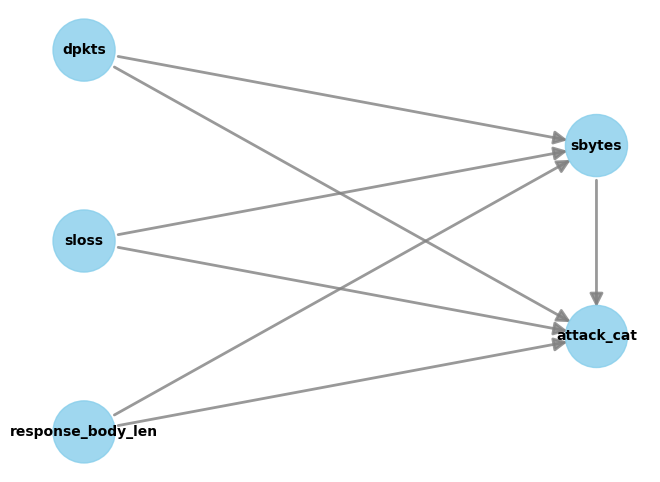

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                 
─────────(E[attack_cat|response_body_len,sloss,dpkts])
d[sbytes]                                             
Estimand assumption 1, Unconfoundedness: If U→{sbytes} and U→attack_cat then P(attack_cat|sbytes,response_body_len,sloss,dpkts,U) = P(attack_cat|sbytes,response_body_len,sloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
    d                                                 
─────────(E[attack_cat|response_body_len,sloss,dpkts])
d[sbytes]                                             
Estimand assumption 1, Unconfoundedness: If U→{sbytes} and U→attack_cat then P(attack_cat|sbytes,response_body_len,sloss,dpkts,U) = P(attack_cat

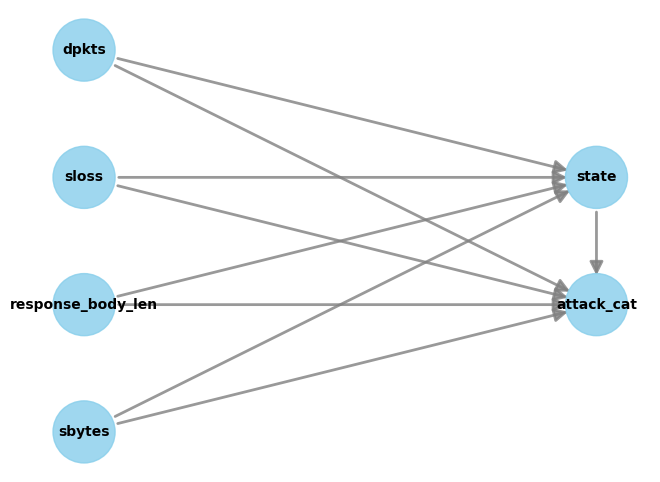

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                        
────────(E[attack_cat|sbytes,response_body_len,sloss,dpkts])
d[state]                                                    
Estimand assumption 1, Unconfoundedness: If U→{state} and U→attack_cat then P(attack_cat|state,sbytes,response_body_len,sloss,dpkts,U) = P(attack_cat|state,sbytes,response_body_len,sloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                                        
────────(E[attack_cat|sbytes,response_body_len,sloss,dpkts])
d[state]                                                    
Estimand assumption 1, Unconfoundedness: If U→{state} and U→attack_cat then P(attack_cat|state,sb

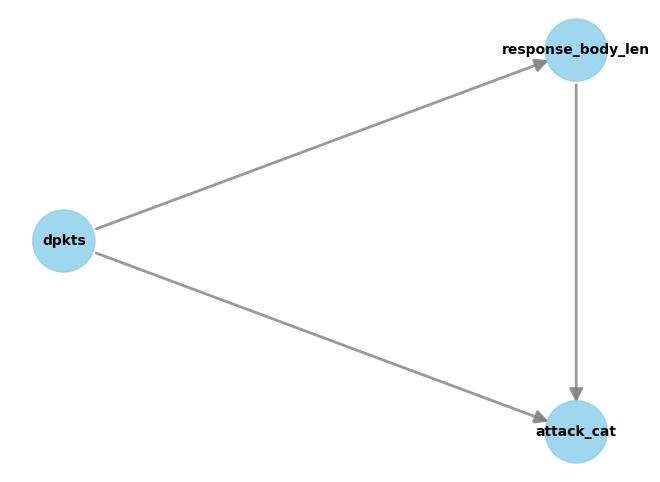

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                               
────────────────────(E[attack_cat|dpkts])
d[response_body_len]                     
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→attack_cat then P(attack_cat|response_body_len,dpkts,U) = P(attack_cat|response_body_len,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
         d                               
────────────────────(E[attack_cat|dpkts])
d[response_body_len]                     
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→attack_cat then P(attack_cat|response_body_len,dpkts,U) = P(attack_cat|response_body_len,dpkts)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified esti

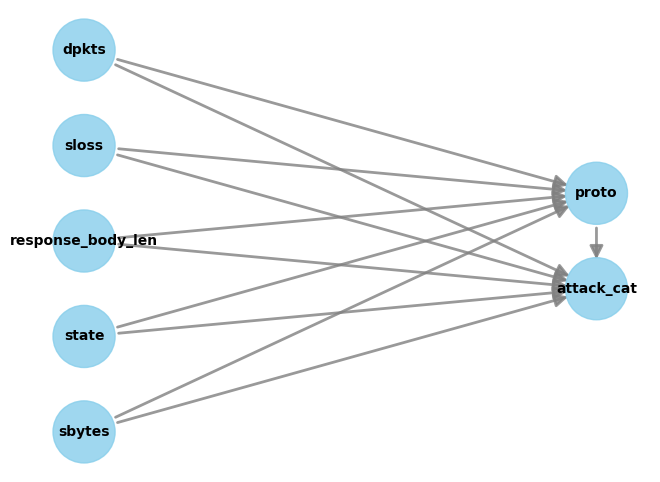

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                              
────────(E[attack_cat|sbytes,state,response_body_len,sloss,dpkts])
d[proto]                                                          
Estimand assumption 1, Unconfoundedness: If U→{proto} and U→attack_cat then P(attack_cat|proto,sbytes,state,response_body_len,sloss,dpkts,U) = P(attack_cat|proto,sbytes,state,response_body_len,sloss,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                                              
────────(E[attack_cat|sbytes,state,response_body_len,sloss,dpkts])
d[proto]                                                          
Estimand assumption 1, Unconfoundedness: If U→{pr

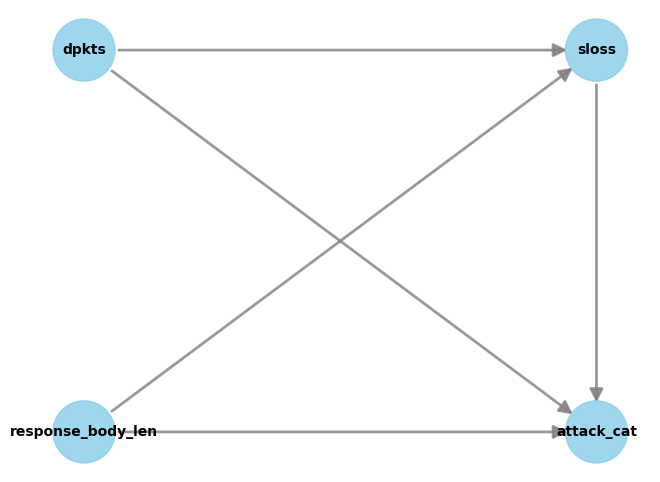

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                           
────────(E[attack_cat|response_body_len,dpkts])
d[sloss]                                       
Estimand assumption 1, Unconfoundedness: If U→{sloss} and U→attack_cat then P(attack_cat|sloss,response_body_len,dpkts,U) = P(attack_cat|sloss,response_body_len,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                           
────────(E[attack_cat|response_body_len,dpkts])
d[sloss]                                       
Estimand assumption 1, Unconfoundedness: If U→{sloss} and U→attack_cat then P(attack_cat|sloss,response_body_len,dpkts,U) = P(attack_cat|sloss,response_body_len,dpkts)


Step 3: Causal Estimate
*** Cau

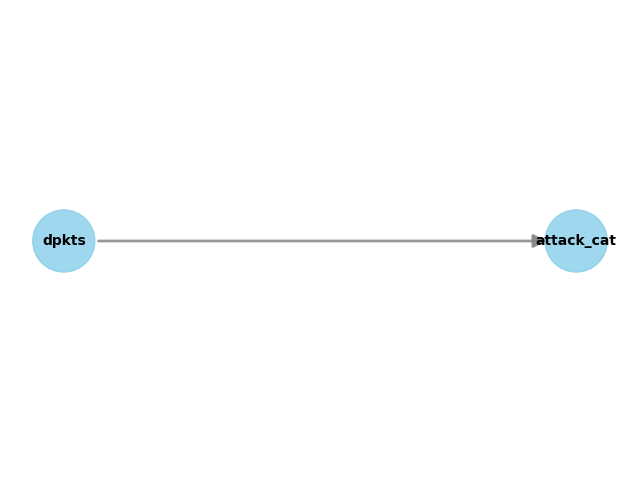

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
────────(E[attack_cat])
d[dpkts]               
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→attack_cat then P(attack_cat|dpkts,,U) = P(attack_cat|dpkts,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                   
────────(E[attack_cat])
d[dpkts]               
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→attack_cat then P(attack_cat|dpkts,,U) = P(attack_cat|dpkts,)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
────────(E[attack_cat])
d[dpkts]               
Estimand assum

In [ ]:
import dowhy
from dowhy import CausalModel
import networkx as nx

def build_dowhy_models_from_paths(adj_matrix, feature_names, outcome_name, lower_limit=1e-6):
    # Step 1: Find all causal paths to the outcome
    causal_paths = find_all_causal_paths(adj_matrix, feature_names, outcome_name, lower_limit)

    # Possible treatments are the distinct starting nodes of these paths
    treatments = list(causal_paths.keys())

    if not treatments:
        raise ValueError(f"No treatments found for outcome '{outcome_name}'. Cannot build models.")

    models = []
    info_list = []

    # Step 2: For each treatment, build a causal graph and DoWhy model
    for treatment_var in treatments:
        # Build a NetworkX graph from adjacency matrix and prune edges below lower_limit
        G = nx.DiGraph()
        for i, col_i in enumerate(feature_names):
            G.add_node(col_i)
            for j, col_j in enumerate(feature_names):
                weight = adj_matrix[i, j]
                if abs(weight) > lower_limit:
                    G.add_edge(col_j, col_i, weight=weight)

        # Confounders = ancestors common to both treatment and outcome
        confounders = nx.ancestors(G, treatment_var).intersection(nx.ancestors(G, outcome_name))

        # Indirect causes = ancestors of treatment but not confounders or treatment itself
        indirect_causes = nx.ancestors(G, treatment_var) - confounders - {treatment_var}

        # Build edges for DOT graph
        edges = []
        for c in confounders:
            edges.append(f"{c} -> {treatment_var}")
            edges.append(f"{c} -> {outcome_name}")
        edges.append(f"{treatment_var} -> {outcome_name}")
        for ic in indirect_causes:
            edges.append(f"{ic} -> {treatment_var}")

        nodes = set([treatment_var, outcome_name]) | confounders | indirect_causes
        dot_graph = "digraph { " + "; ".join(edges) + " }"

        # Build DoWhy causal model restricting to relevant variables
        model = CausalModel(
            data=df[list(nodes)],
            graph=dot_graph.replace("\n", " "),
            treatment=treatment_var,
            outcome=outcome_name
        )

        models.append(model)
        info_list.append({
            "treatment": treatment_var,
            "confounders": list(confounders),
            "indirect_causes": list(indirect_causes),
            "graph": dot_graph
        })

    return models, info_list, treatments


# ==== Example usage ====
labels = list(df.columns)
adj_matrix = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

lower_limit = 0.1

models, info_list, treatments = build_dowhy_models_from_paths(
    adj_matrix, labels, "attack_cat", lower_limit
)
results = []
outcome = "attack_cat"  # your outcome variable

for info, model in zip(info_list, models):
    print(f"\nTreatment variable: {info['treatment']}")
    print("Confounders:", info['confounders'])
    print("Indirect causes:", info['indirect_causes'])
    model.view_model()
    try:
    # Step 2: Identify the causal effect
        identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
        print("Step 2: Identified Estimand")
        print(identified_estimand)

        # Step 3: Estimate the effect
        estimate = model.estimate_effect(
            identified_estimand,
            method_name="backdoor.linear_regression",
            target_units="ate"
        )
        print("\nStep 3: Causal Estimate")
        print(estimate)

        # Extract conditional estimates if available
        conditional_estimates = getattr(estimate, 'conditional_estimates', None)
        conditional_str = ""
        if conditional_estimates is not None:
            conditional_str = str(conditional_estimates).replace('\n', '; ')

        # Step 4: Refutations
        refute_random = model.refute_estimate(
            identified_estimand, estimate, method_name="random_common_cause"
        )
        print("\nStep 4: Refutation 1 - Random Common Cause")
        print(refute_random)

        refute_placebo = model.refute_estimate(
            identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute"
        )
        print("\nStep 4: Refutation 2 - Placebo Treatment")
        print(refute_placebo)

        refute_subset = model.refute_estimate(
            identified_estimand, estimate, method_name="data_subset_refuter", subset_fraction=0.8
        )
        print("\nStep 4: Refutation 3 - Data Subset")
        print(refute_subset)

        # Store results in dictionary
        result = {
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': estimate.value,
            'Conditional_Estimates': conditional_str,
            'Results_Estimate': str(estimate),
            'Random_Common_Cause_New_Effect': refute_random.new_effect,
            'Random_Common_Cause_p_value': refute_random.refutation_result.get('p_value', np.nan),
            'Placebo_Treatment_New_Effect': refute_placebo.new_effect,
            'Placebo_Treatment_p_value': refute_placebo.refutation_result.get('p_value', np.nan),
            'Data_Subset_New_Effect': refute_subset.new_effect,
            'Data_Subset_p_value': refute_subset.refutation_result.get('p_value', np.nan)
        }
        results.append(result)

    except Exception as e:
        print(f"Failed to analyze {treatment} ➝ {outcome}: {e}")
        results.append({
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': np.nan,
            'Conditional_Estimates': '',
            'Random_Common_Cause_New_Effect': np.nan,
            'Random_Common_Cause_p_value': np.nan,
            'Placebo_Treatment_New_Effect': np.nan,
            'Placebo_Treatment_p_value': np.nan,
            'Data_Subset_New_Effect': np.nan,
            'Data_Subset_p_value': np.nan
        })

results_df = pd.DataFrame(results)
results_df.to_csv(f'/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_attack_cat_2_{lower_limit}.csv', index=False)
print(f"\nResults saved to /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_attack_cat_2_{lower_limit}.csv")




### adding common causes

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...



Treatment variable: response_body_len
Confounders: ['dpkts']
Indirect causes: []


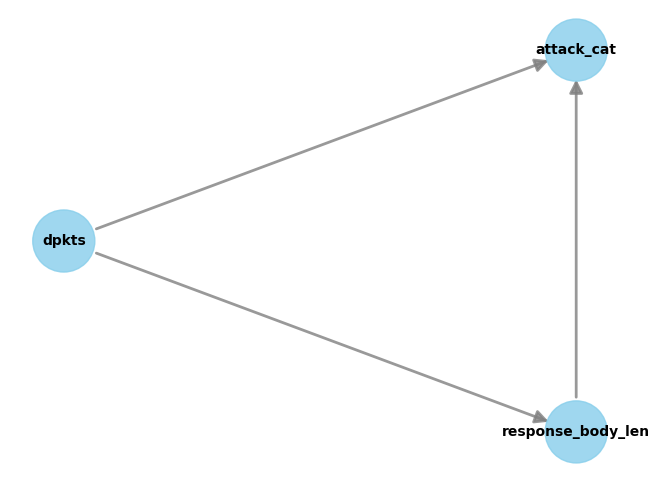

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                               
────────────────────(E[attack_cat|dpkts])
d[response_body_len]                     
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→attack_cat then P(attack_cat|response_body_len,dpkts,U) = P(attack_cat|response_body_len,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
         d                               
────────────────────(E[attack_cat|dpkts])
d[response_body_len]                     
Estimand assumption 1, Unconfoundedness: If U→{response_body_len} and U→attack_cat then P(attack_cat|response_body_len,dpkts,U) = P(attack_cat|response_body_len,dpkts)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified esti

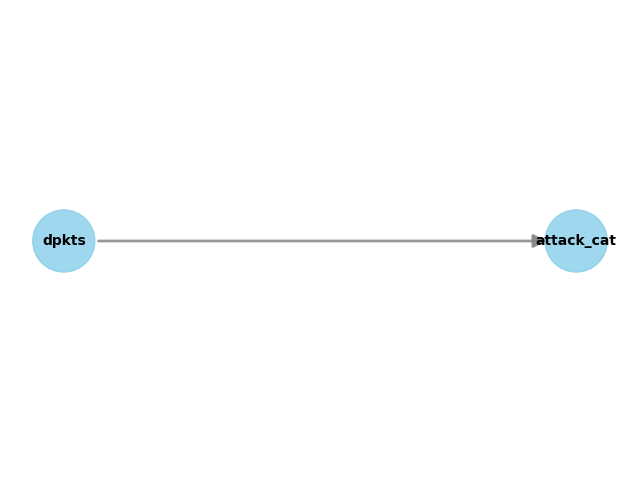

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
────────(E[attack_cat])
d[dpkts]               
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→attack_cat then P(attack_cat|dpkts,,U) = P(attack_cat|dpkts,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                   
────────(E[attack_cat])
d[dpkts]               
Estimand assumption 1, Unconfoundedness: If U→{dpkts} and U→attack_cat then P(attack_cat|dpkts,,U) = P(attack_cat|dpkts,)


Step 3: Causal Estimate
*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                   
────────(E[attack_cat])
d[dpkts]               
Estimand assum

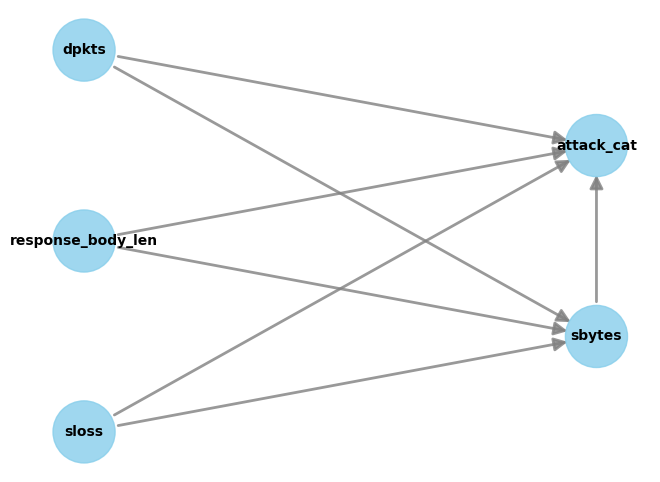

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                                 
─────────(E[attack_cat|sloss,response_body_len,dpkts])
d[sbytes]                                             
Estimand assumption 1, Unconfoundedness: If U→{sbytes} and U→attack_cat then P(attack_cat|sbytes,sloss,response_body_len,dpkts,U) = P(attack_cat|sbytes,sloss,response_body_len,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
    d                                                 
─────────(E[attack_cat|sloss,response_body_len,dpkts])
d[sbytes]                                             
Estimand assumption 1, Unconfoundedness: If U→{sbytes} and U→attack_cat then P(attack_cat|sbytes,sloss,response_body_len,dpkts,U) = P(attack_cat

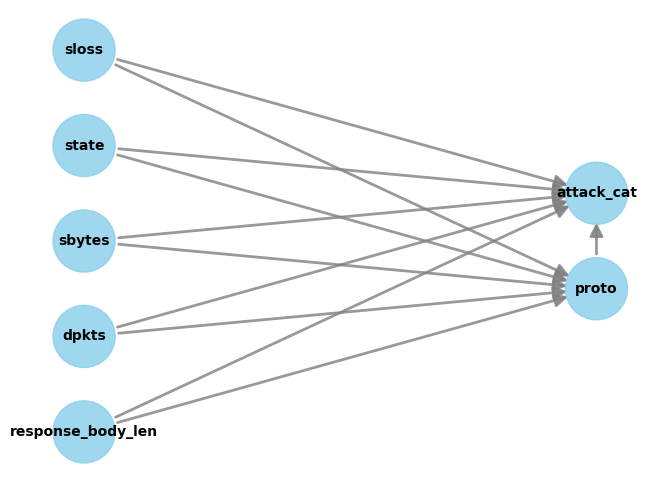

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                              
────────(E[attack_cat|response_body_len,dpkts,sbytes,state,sloss])
d[proto]                                                          
Estimand assumption 1, Unconfoundedness: If U→{proto} and U→attack_cat then P(attack_cat|proto,response_body_len,dpkts,sbytes,state,sloss,U) = P(attack_cat|proto,response_body_len,dpkts,sbytes,state,sloss)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                                              
────────(E[attack_cat|response_body_len,dpkts,sbytes,state,sloss])
d[proto]                                                          
Estimand assumption 1, Unconfoundedness: If U→{pr

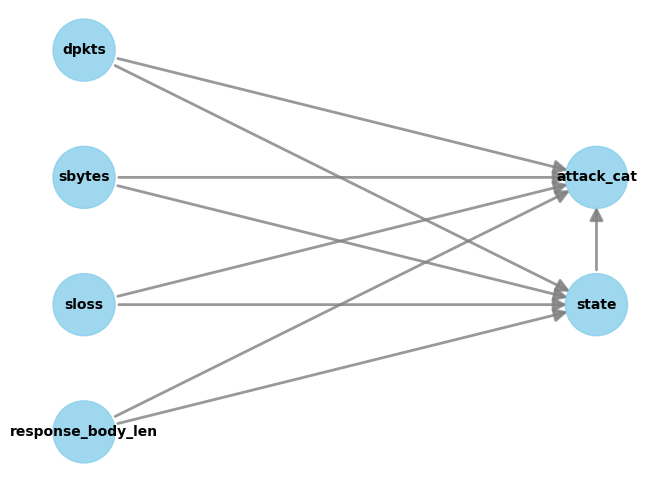

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                                        
────────(E[attack_cat|response_body_len,sloss,sbytes,dpkts])
d[state]                                                    
Estimand assumption 1, Unconfoundedness: If U→{state} and U→attack_cat then P(attack_cat|state,response_body_len,sloss,sbytes,dpkts,U) = P(attack_cat|state,response_body_len,sloss,sbytes,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                                        
────────(E[attack_cat|response_body_len,sloss,sbytes,dpkts])
d[state]                                                    
Estimand assumption 1, Unconfoundedness: If U→{state} and U→attack_cat then P(attack_cat|state,re

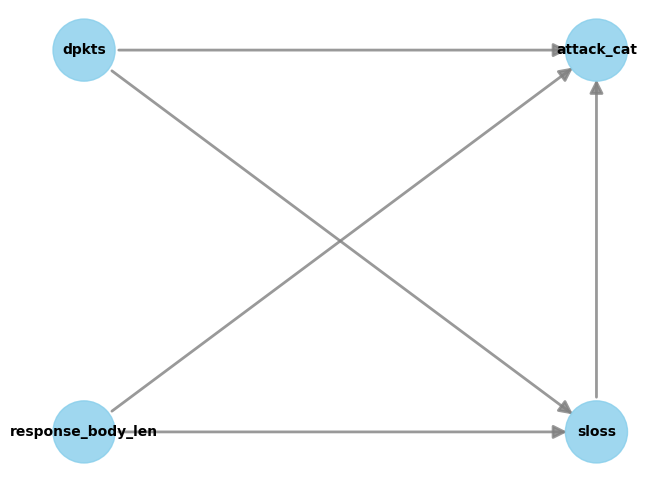

Step 2: Identified Estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                                           
────────(E[attack_cat|response_body_len,dpkts])
d[sloss]                                       
Estimand assumption 1, Unconfoundedness: If U→{sloss} and U→attack_cat then P(attack_cat|sloss,response_body_len,dpkts,U) = P(attack_cat|sloss,response_body_len,dpkts)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                                           
────────(E[attack_cat|response_body_len,dpkts])
d[sloss]                                       
Estimand assumption 1, Unconfoundedness: If U→{sloss} and U→attack_cat then P(attack_cat|sloss,response_body_len,dpkts,U) = P(attack_cat|sloss,response_body_len,dpkts)


Step 3: Causal Estimate
*** Cau

In [10]:
def build_dowhy_models_from_paths(adj_matrix, feature_names, outcome_name, lower_limit=1e-6):
    # Step 1: Find all causal paths to the outcome
    causal_paths = find_all_causal_paths(adj_matrix, feature_names, outcome_name, lower_limit)

    treatments = list(causal_paths.keys())
    if not treatments:
        raise ValueError(f"No treatments found for outcome '{outcome_name}'.")

    models = []
    info_list = []

    for treatment_var in treatments:
        # Build graph
        G = nx.DiGraph()
        for i, col_i in enumerate(feature_names):
            G.add_node(col_i)
            for j, col_j in enumerate(feature_names):
                weight = adj_matrix[i, j]
                if abs(weight) > lower_limit:
                    G.add_edge(col_j, col_i, weight=weight)

        # Confounders = ancestors of both treatment and outcome
        confounders = nx.ancestors(G, treatment_var).intersection(nx.ancestors(G, outcome_name))

        # Indirect causes
        indirect_causes = nx.ancestors(G, treatment_var) - confounders - {treatment_var}

        # DOT graph
        edges = []
        for c in confounders:
            edges.append(f"{c} -> {treatment_var}")
            edges.append(f"{c} -> {outcome_name}")
        edges.append(f"{treatment_var} -> {outcome_name}")
        for ic in indirect_causes:
            edges.append(f"{ic} -> {treatment_var}")
        dot_graph = "digraph { " + "; ".join(edges) + " }"

        # Build DoWhy model with common_causes parameter
        model = CausalModel(
            data=df[[treatment_var, outcome_name] + list(confounders) + list(indirect_causes)],
            treatment=treatment_var,
            outcome=outcome_name,
            common_causes=list(confounders),  # Pass confounders here
            graph=dot_graph.replace("\n", " ")
        )

        models.append(model)
        info_list.append({
            "treatment": treatment_var,
            "confounders": list(confounders),
            "indirect_causes": list(indirect_causes),
            "graph": dot_graph
        })

    return models, info_list, treatments

# ==== Example usage ====
labels = list(df.columns)
adj_matrix = pd.read_csv(
    "/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-discovery/culingam_adjacency_matrix_gpu.csv",
    index_col=0
).to_numpy()

lower_limit = 0.1

models, info_list, treatments = build_dowhy_models_from_paths(
    adj_matrix, labels, "attack_cat", lower_limit
)
results = []
outcome = "attack_cat"  # your outcome variable

for info, model in zip(info_list, models):
    print(f"\nTreatment variable: {info['treatment']}")
    print("Confounders:", info['confounders'])
    print("Indirect causes:", info['indirect_causes'])
    model.view_model()
    try:
    # Step 2: Identify the causal effect
        identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
        print("Step 2: Identified Estimand")
        print(identified_estimand)

        # Step 3: Estimate the effect
        estimate = model.estimate_effect(
            identified_estimand,
            method_name="backdoor.linear_regression",
            target_units="ate"
        )
        print("\nStep 3: Causal Estimate")
        print(estimate)

        # Extract conditional estimates if available
        conditional_estimates = getattr(estimate, 'conditional_estimates', None)
        conditional_str = ""
        if conditional_estimates is not None:
            conditional_str = str(conditional_estimates).replace('\n', '; ')

        # Step 4: Refutations
        refute_random = model.refute_estimate(
            identified_estimand, estimate, method_name="random_common_cause"
        )
        print("\nStep 4: Refutation 1 - Random Common Cause")
        print(refute_random)

        refute_placebo = model.refute_estimate(
            identified_estimand, estimate, method_name="placebo_treatment_refuter", placebo_type="permute"
        )
        print("\nStep 4: Refutation 2 - Placebo Treatment")
        print(refute_placebo)

        refute_subset = model.refute_estimate(
            identified_estimand, estimate, method_name="data_subset_refuter", subset_fraction=0.8
        )
        print("\nStep 4: Refutation 3 - Data Subset")
        print(refute_subset)

        # Store results in dictionary
        result = {
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': estimate.value,
            'Conditional_Estimates': conditional_str,
            'Results_Estimate': str(estimate),
            'Random_Common_Cause_New_Effect': refute_random.new_effect,
            'Random_Common_Cause_p_value': refute_random.refutation_result.get('p_value', np.nan),
            'Placebo_Treatment_New_Effect': refute_placebo.new_effect,
            'Placebo_Treatment_p_value': refute_placebo.refutation_result.get('p_value', np.nan),
            'Data_Subset_New_Effect': refute_subset.new_effect,
            'Data_Subset_p_value': refute_subset.refutation_result.get('p_value', np.nan)
        }
        results.append(result)

    except Exception as e:
        print(f"Failed to analyze {treatment} ➝ {outcome}: {e}")
        results.append({
            'Treatment': treatment,
            'Outcome': outcome,
            'ATE': np.nan,
            'Conditional_Estimates': '',
            'Random_Common_Cause_New_Effect': np.nan,
            'Random_Common_Cause_p_value': np.nan,
            'Placebo_Treatment_New_Effect': np.nan,
            'Placebo_Treatment_p_value': np.nan,
            'Data_Subset_New_Effect': np.nan,
            'Data_Subset_p_value': np.nan
        })

results_df = pd.DataFrame(results)
results_df.to_csv(f'/content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_attack_cat_CC_{lower_limit}.csv', index=False)
print(f"\nResults saved to /content/drive/MyDrive/Data-science-project/journal-article/UNSW_NB15/causal-inference/causal_model_attack_cat_CC_{lower_limit}.csv")

